Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

## Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize data
df = pd.read_csv('athlete_events.csv', usecols=['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
                                                'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

## Clean Data
- Convert height to feet
- Convert weight to pounds

In [3]:
# Convert data into imperial units
df['Height'] = df['Height'] / 30.48
df['Weight'] = df['Weight'] * 2.20462

## Convert athletics to Track and Field

In [18]:
df.loc[df['Sport'] == 'Athletics', 'Sport'] = 'Track and Field'

## Overview of data

In [15]:
df.head()

ID                      Name Sex   Age    Height     Weight         Team  \
0   1                 A Dijiang   M  24.0  5.905512  176.36960        China   
1   2                  A Lamusi   M  23.0  5.577428  132.27720        China   
4   5  Christine Jacoba Aaftink   F  21.0  6.069554  180.77884  Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0  6.069554  180.77884  Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0  6.069554  180.77884  Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN

## Male and Female Weight/Height Scatterplot

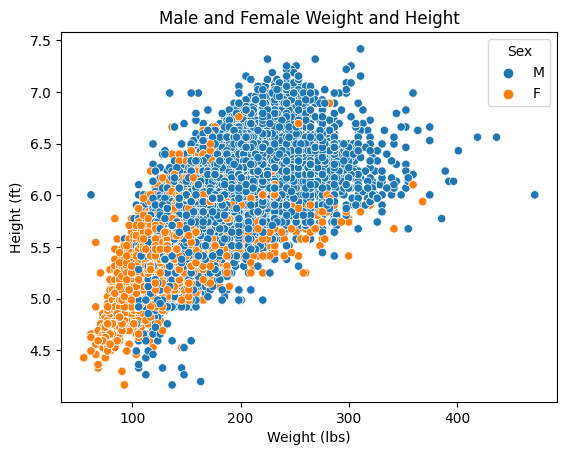

In [4]:
# Male and Female Weight and Height
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=df)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (ft)')
plt.title('Male and Female Weight and Height')
plt.show()

As we may have assumed the height and weight is in general greater for the male athletes than the female athlese

## Atheletes per Year by Sex

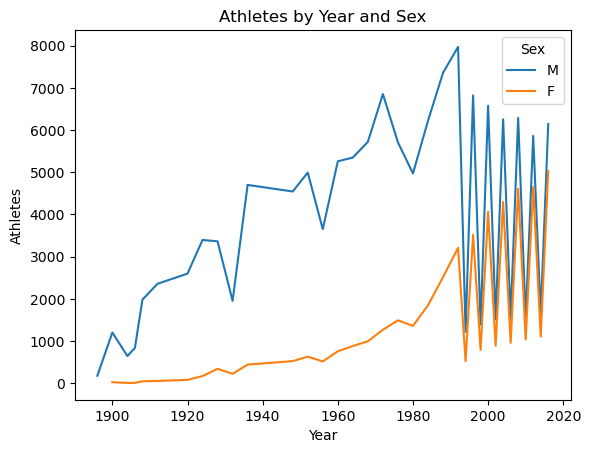

In [5]:
# Athletes by year and sex
year_sex_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
sns.lineplot(x='Year', y='ID', hue='Sex', data=year_sex_counts)
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.title('Athletes by Year and Sex')
plt.show()

We can determine that there was probably less collected data during the early 1900s, but we can see the number of male athletes was significantly higher during the 1900s. Then in the 2000s the number of female athletes increased greatly almost getting lose to the number of male athletes.

## Average number of athletes per year for each country

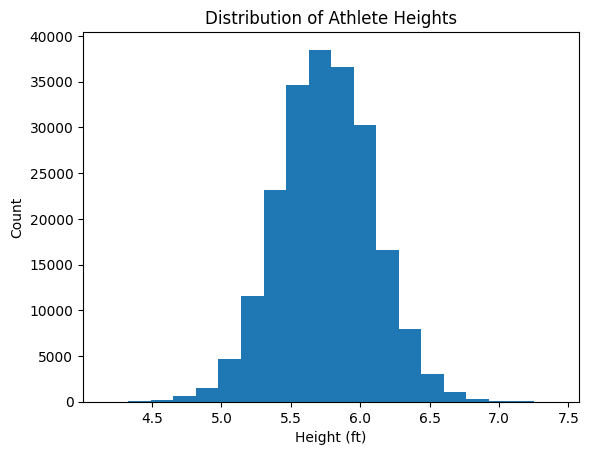

In [23]:
# Extract the Height column and convert to a NumPy array
heights = np.array(df['Height'])

# Plot a histogram of the heights
plt.hist(heights, bins=20)
plt.xlabel('Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Athlete Heights')
plt.show()

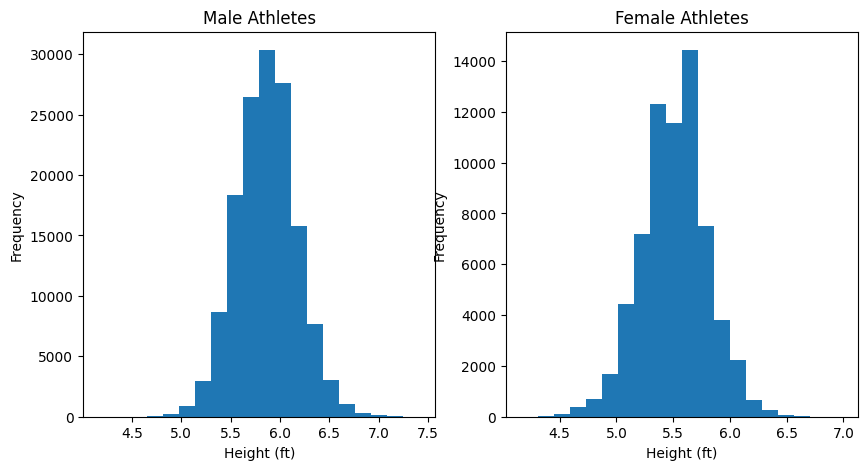

In [22]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

# plot histograms of height for each gender
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.hist(male_df['Height'], bins=20)
ax1.set_xlabel('Height (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Male Athletes')
ax2.hist(female_df['Height'], bins=20)
ax2.set_xlabel('Height (ft)')
ax2.set_ylabel('Frequency')
ax2.set_title('Female Athletes')
plt.show()

In [6]:
""""
counted = df.groupby(['Team', 'Year']).size()

# calculate the average number of athletes for each team over the years
avg_num_athletes = counted.groupby([]'Team').mean().nlargest(10)

# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes
avg_num_athletes.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average number of athletes')
plt.title('Average number of athletes per team over the years')
plt.show()
"""

'"\ncounted = df.groupby([\'Team\', \'Year\']).size()\n\n# calculate the average number of athletes for each team over the years\navg_num_athletes = counted.groupby([]\'Team\').mean().nlargest(10)\n\n# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes\navg_num_athletes.plot(kind=\'bar\')\nplt.xlabel(\'Country\')\nplt.ylabel(\'Average number of athletes\')\nplt.title(\'Average number of athletes per team over the years\')\nplt.show()\n'

## Medal Counts by Country

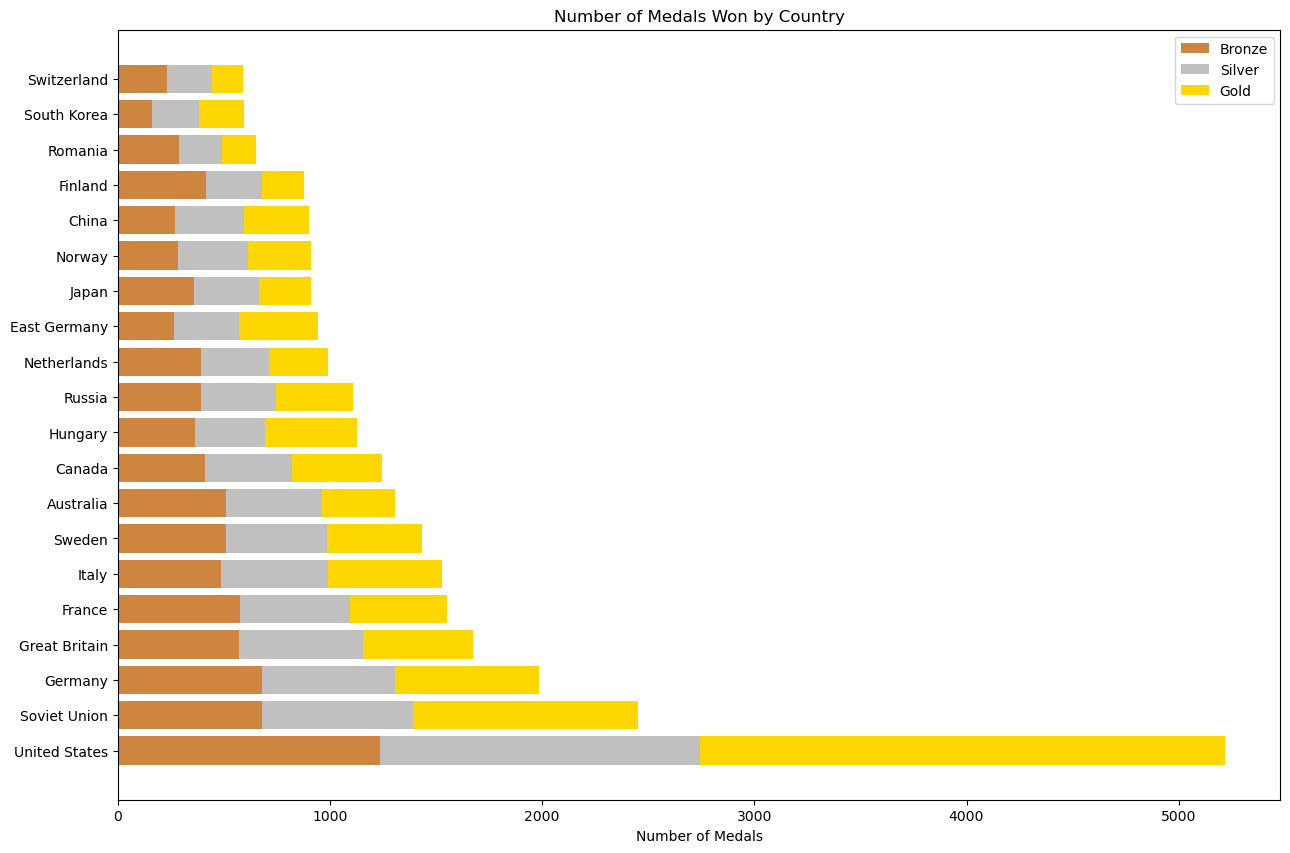

In [7]:
# Separate medal counts by country
gold = df[df['Medal'] == 'Gold'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Gold'})
silver = df[df['Medal'] == 'Silver'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Silver'})
bronze = df[df['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Bronze'})

# Merge dataframes
medals = pd.merge(bronze, silver, on='Team', how='outer')
medals = pd.merge(medals, gold, on='Team', how='outer')
medals = medals.fillna(0)
medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# Sort medals
medals = medals.sort_values('Total', ascending=False).head(20)

# Create bar plot
plt.figure(figsize=(15, 10))
plt.barh(medals['Team'], medals['Bronze'], color='peru', label='Bronze')
plt.barh(medals['Team'], medals['Silver'], left=medals['Bronze'], color='silver', label='Silver')
plt.barh(medals['Team'], medals['Gold'], left=medals['Bronze'] + medals['Silver'], color='gold', label='Gold')
plt.xlabel('Number of Medals')
plt.title('Number of Medals Won by Country')
plt.legend()
plt.show()


## Country Medals by Decade Heatmap

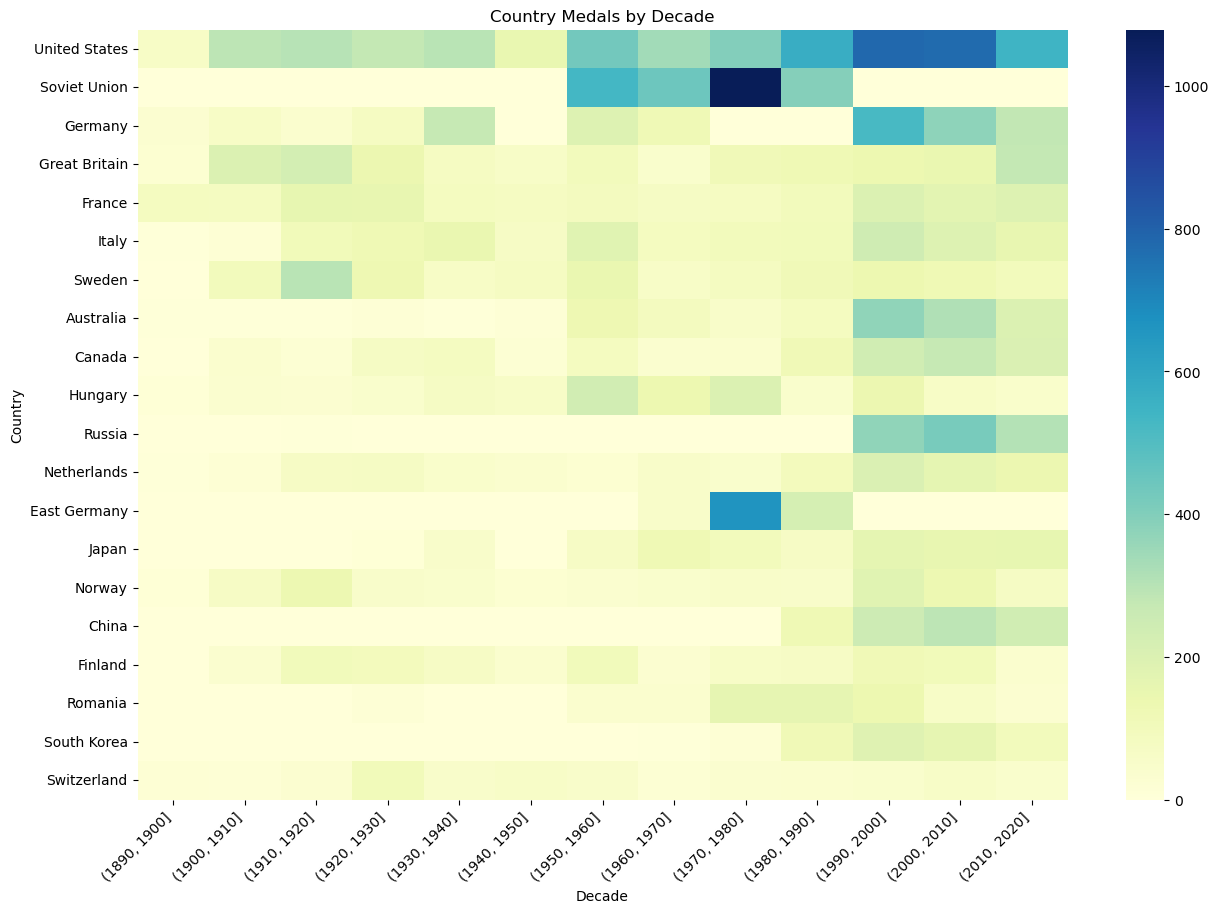

In [8]:
bins = np.arange(1890, 2021, 10)
medals_by_country_decade = df.groupby(['Team', pd.cut(df['Year'], bins=bins)])['Medal'].count().reset_index().pivot(index='Team', columns='Year', values='Medal')
medals = df.groupby('Team')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(20)

medals_by_country_decade = medals_by_country_decade.loc[medals['Team'], :]

# Create heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(medals_by_country_decade, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Country')
plt.title('Country Medals by Decade')
plt.show()


C:\Users\tdogl\AppData\Local\Temp\ipykernel_13964\2131967694.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()


The sport with the tallest average males is Basketball, with an average height of 6.4 ft
The sport with the tallest average females is Basketball, with an average height of 6.0 ft


C:\Users\tdogl\AppData\Local\Temp\ipykernel_13964\2131967694.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


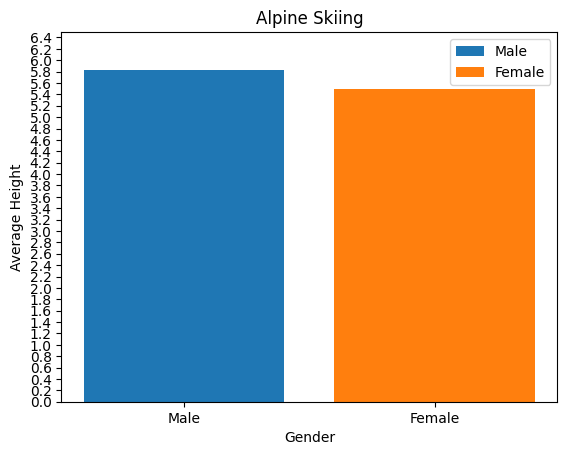

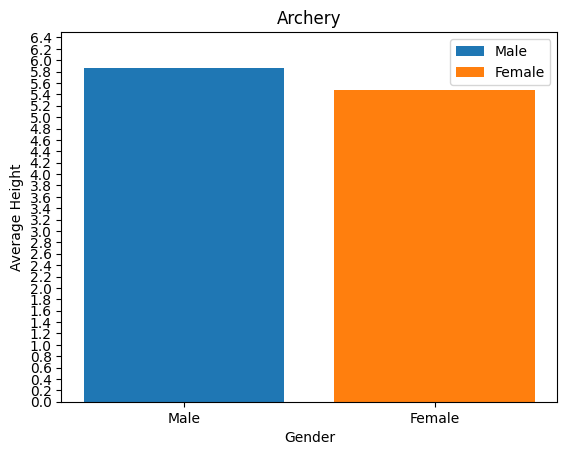

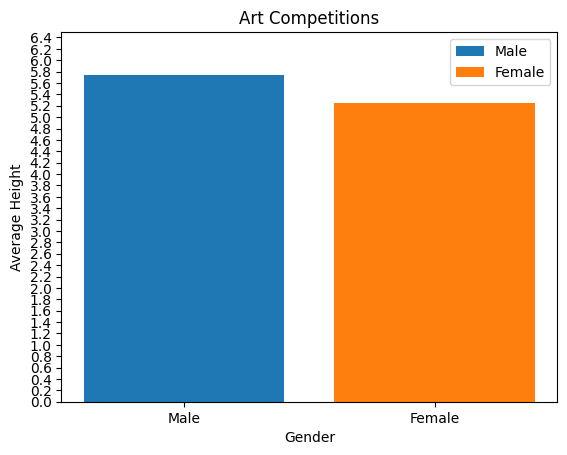

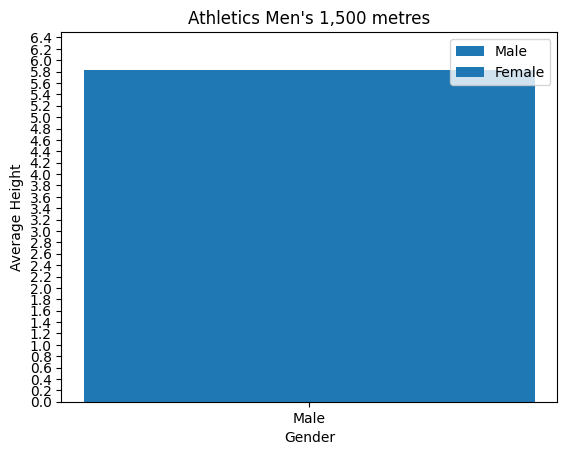

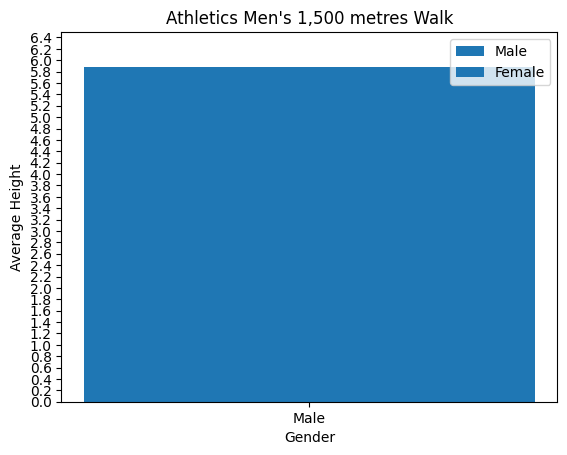

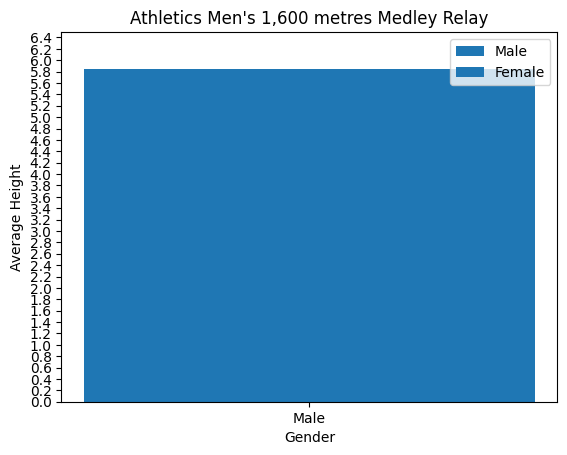

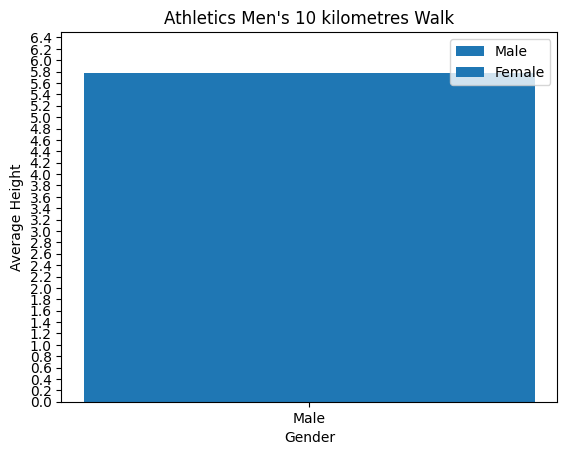

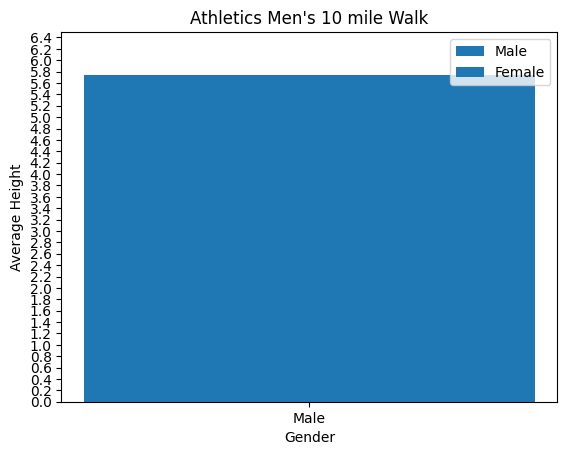

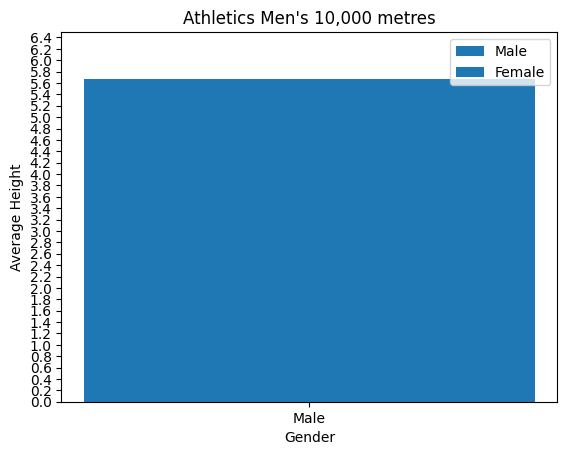

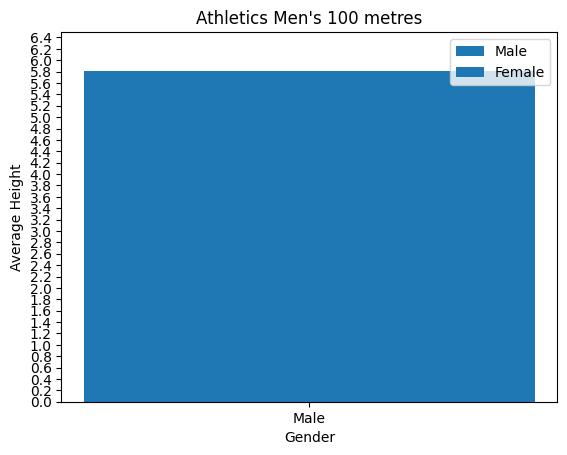

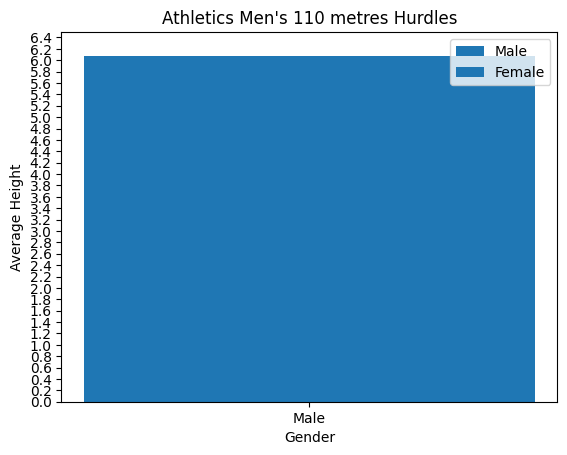

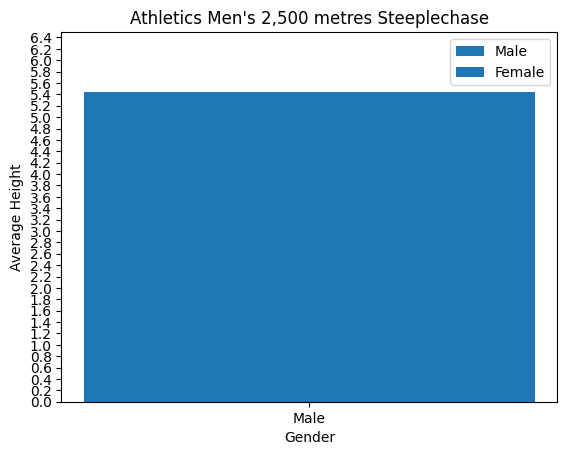

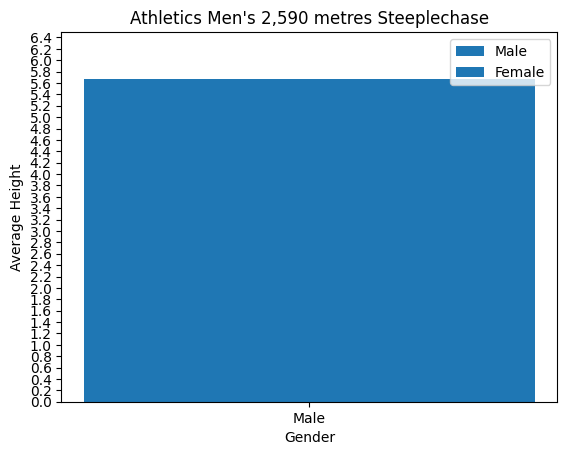

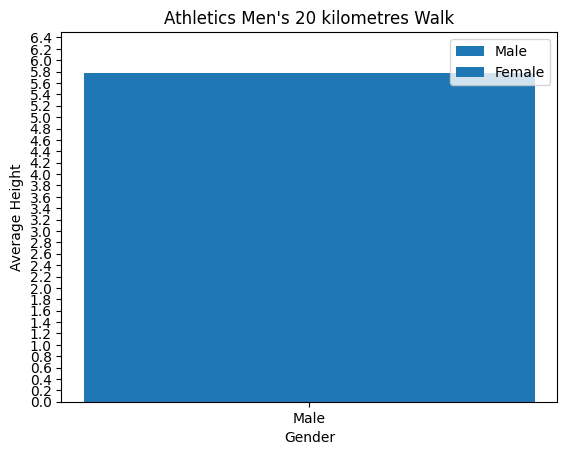

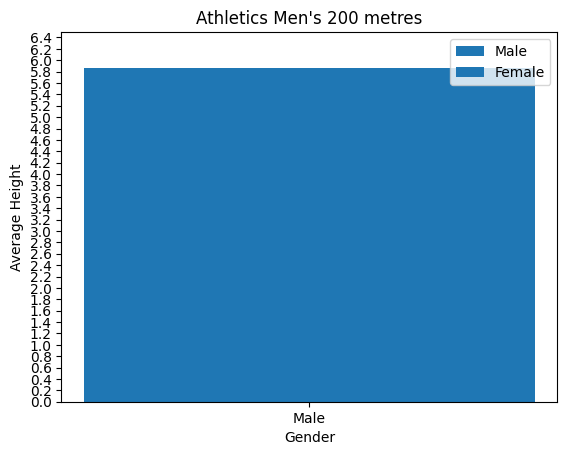

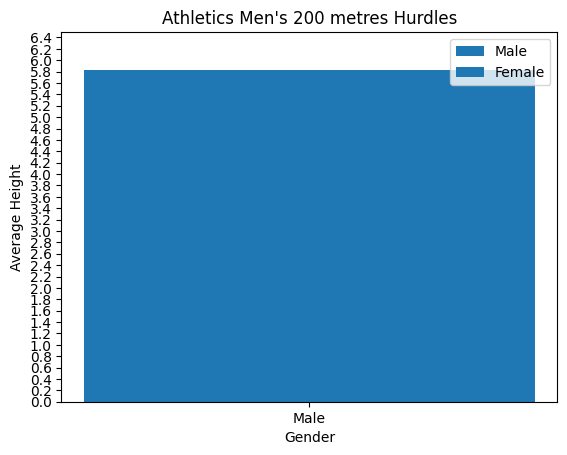

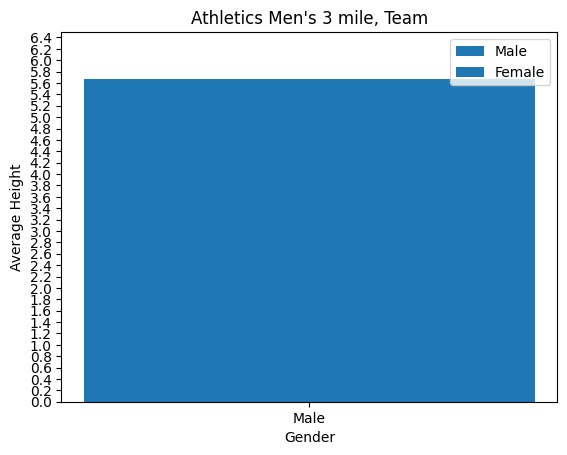

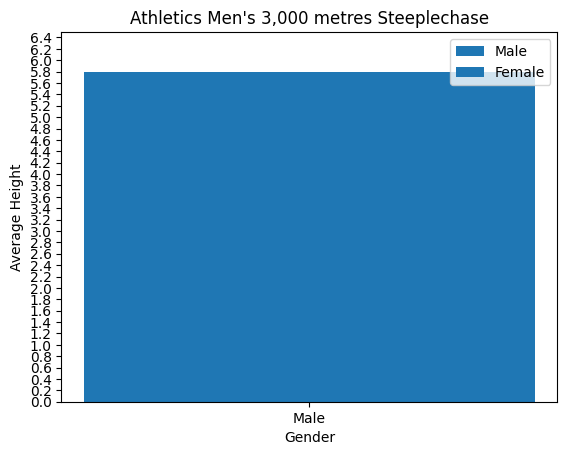

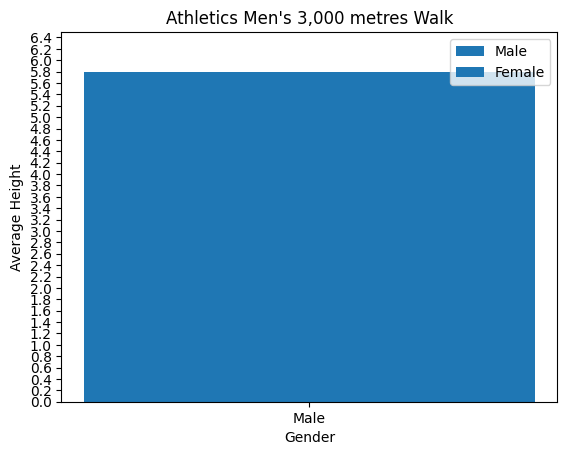

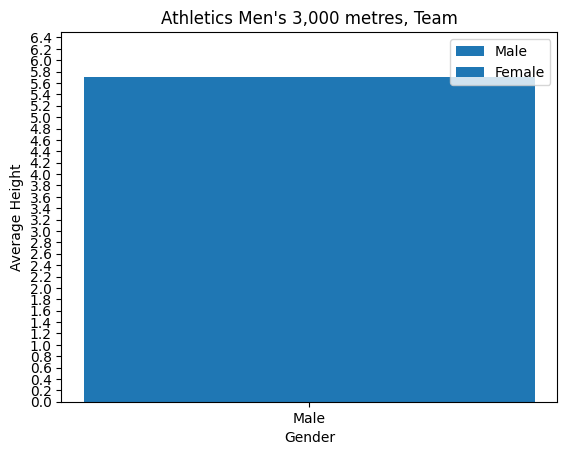

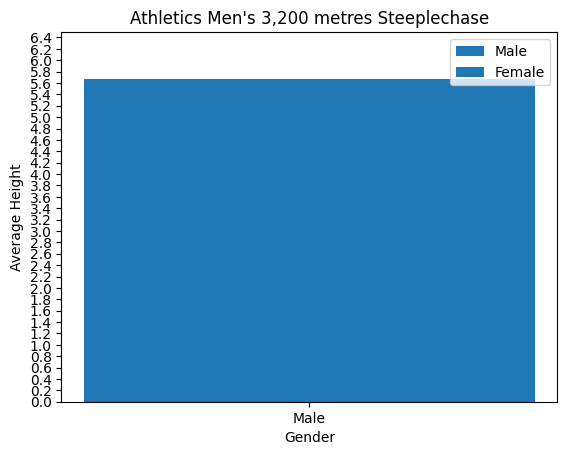

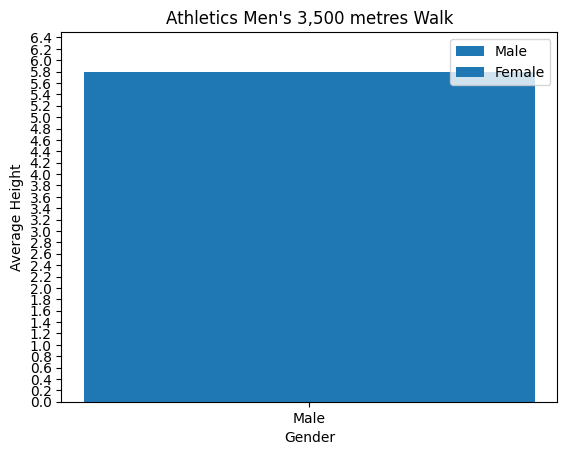

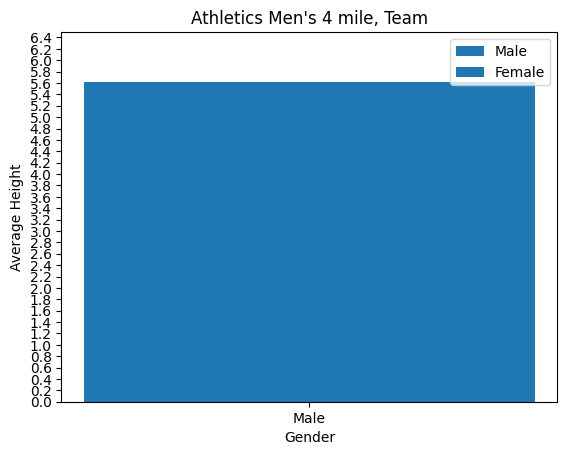

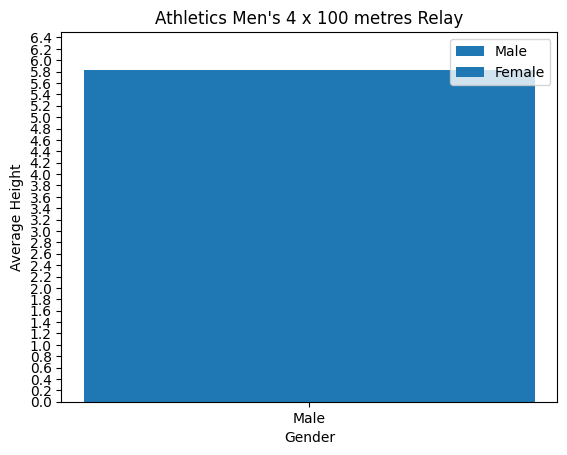

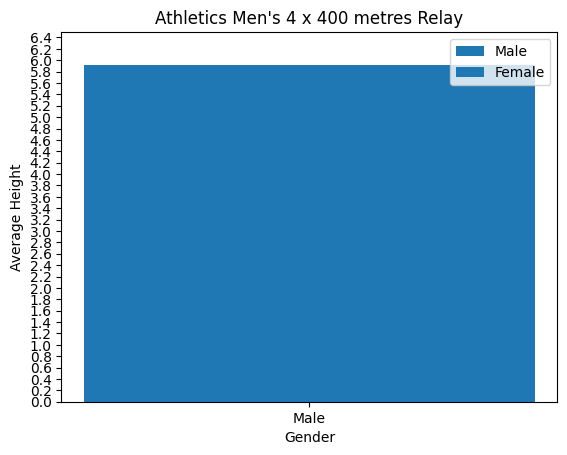

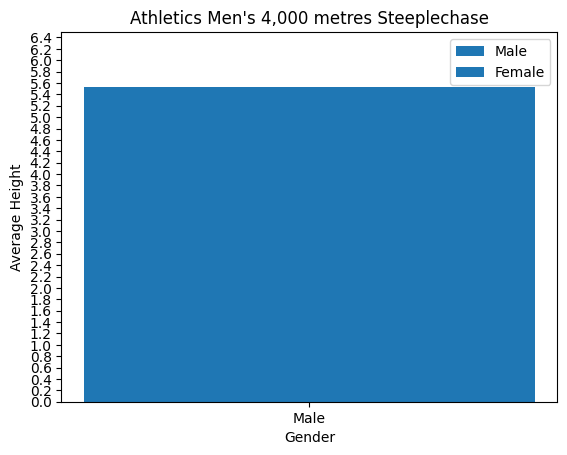

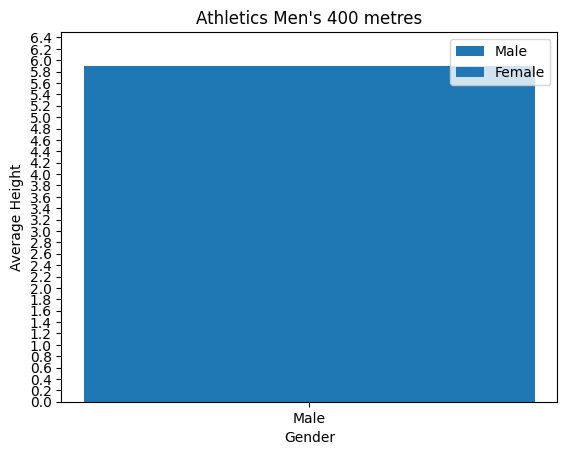

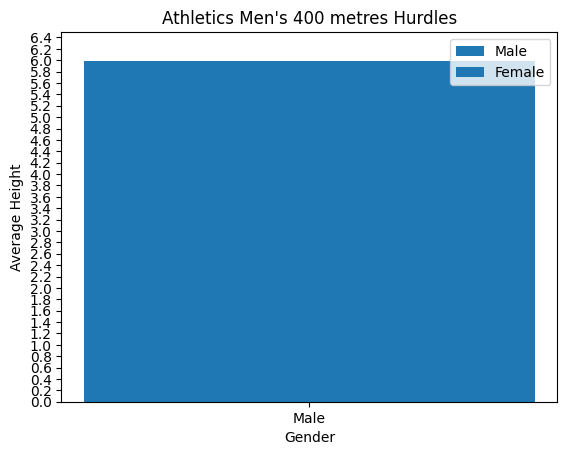

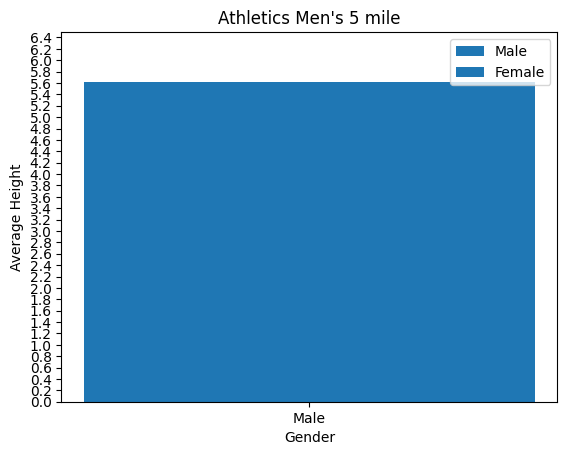

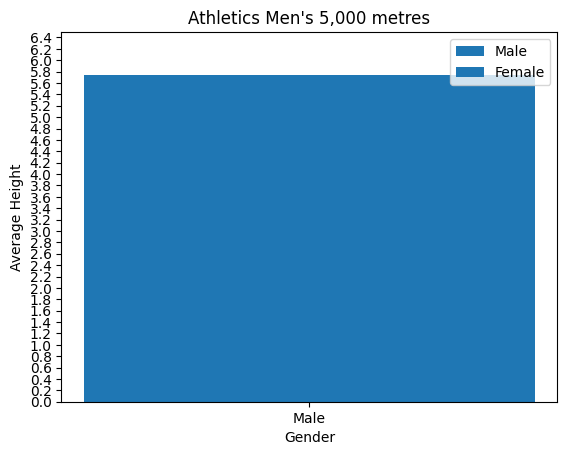

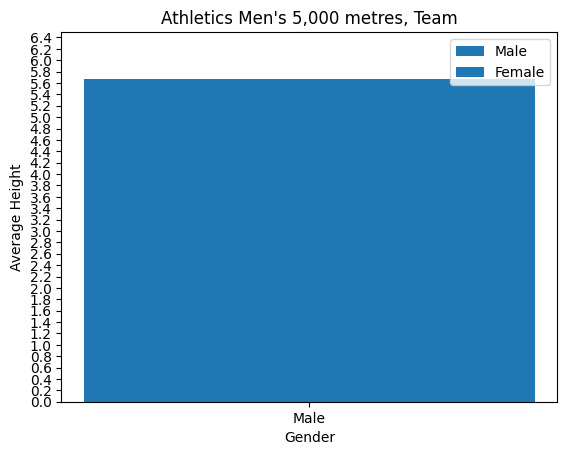

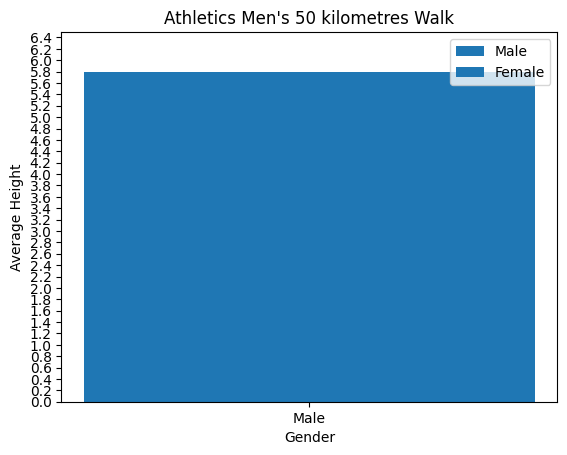

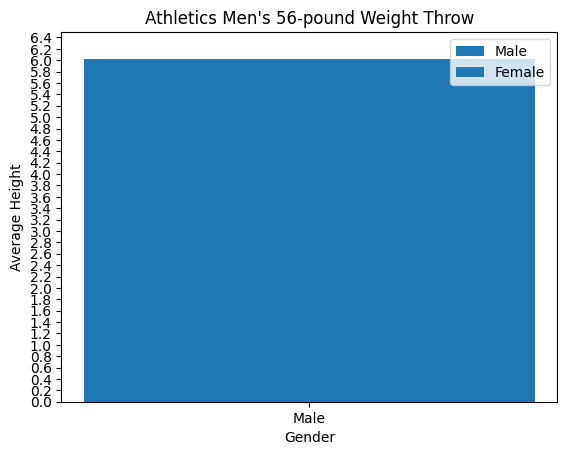

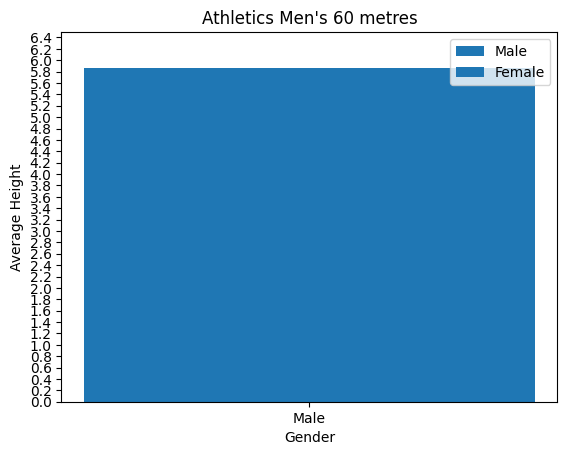

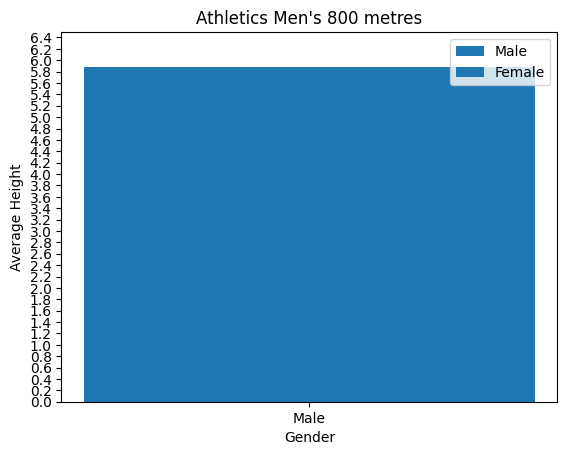

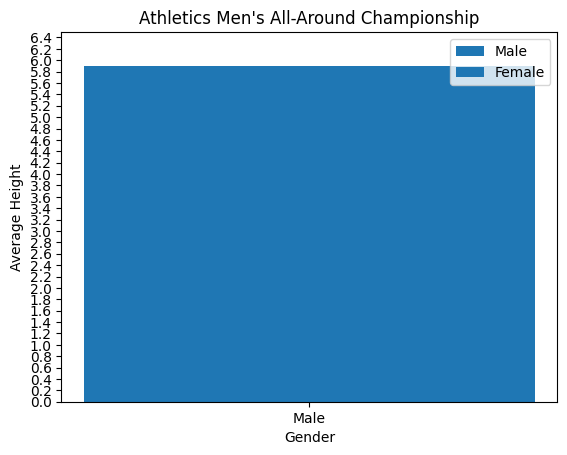

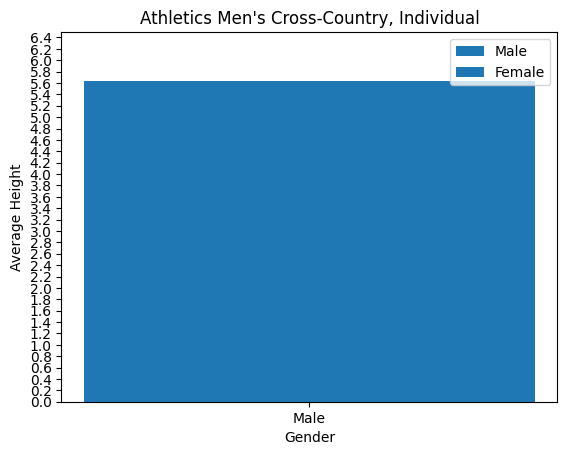

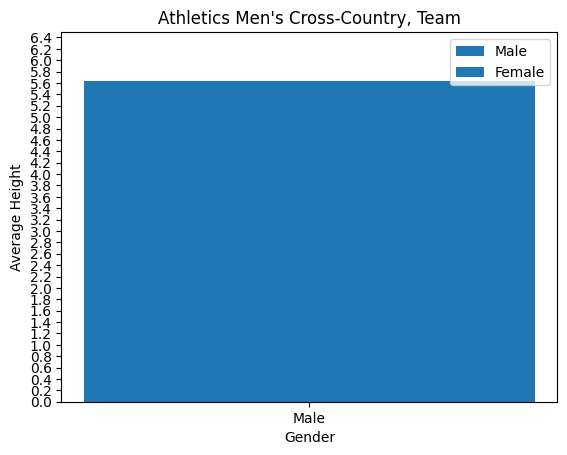

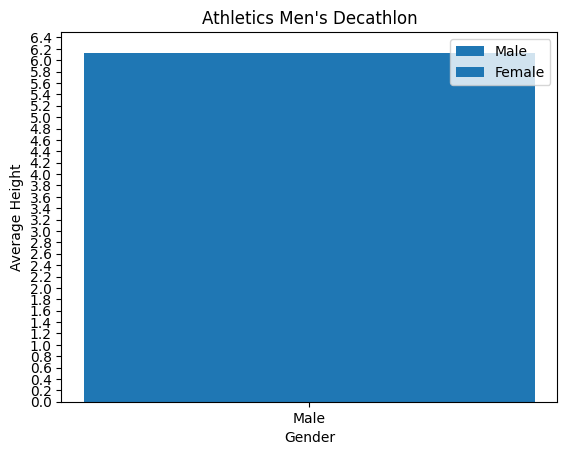

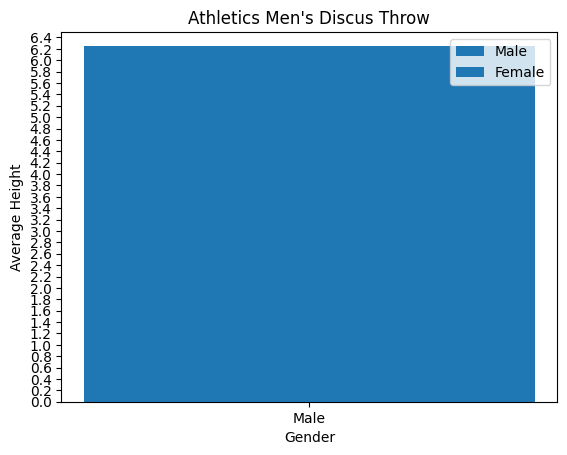

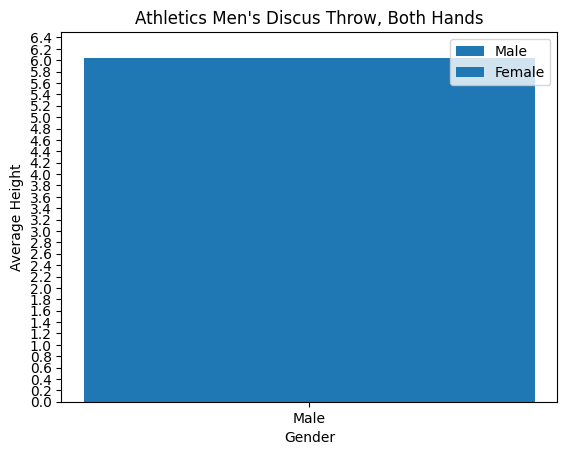

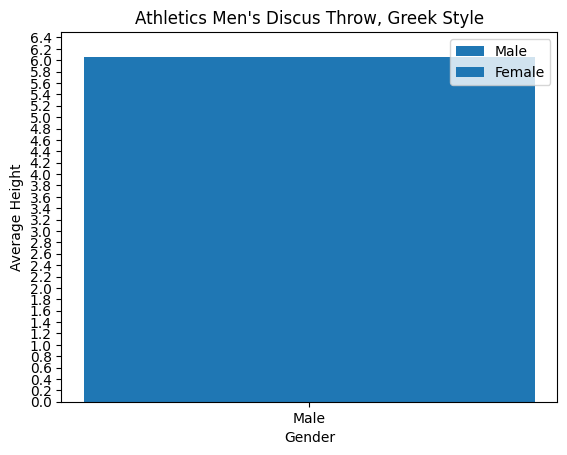

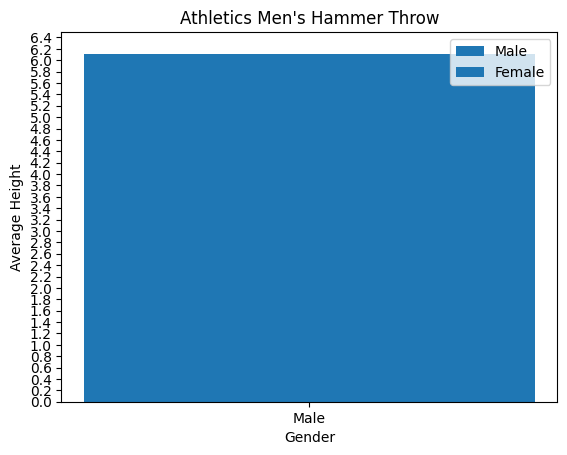

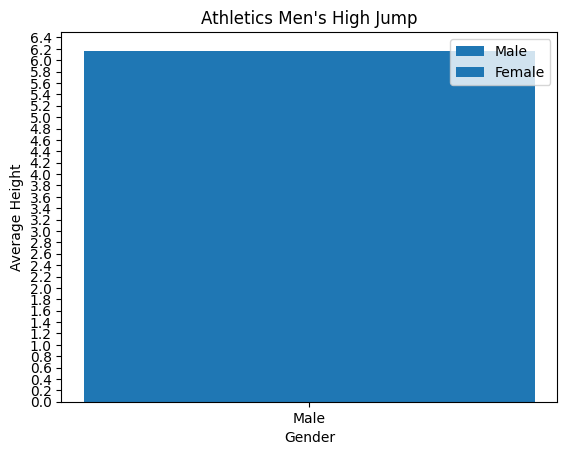

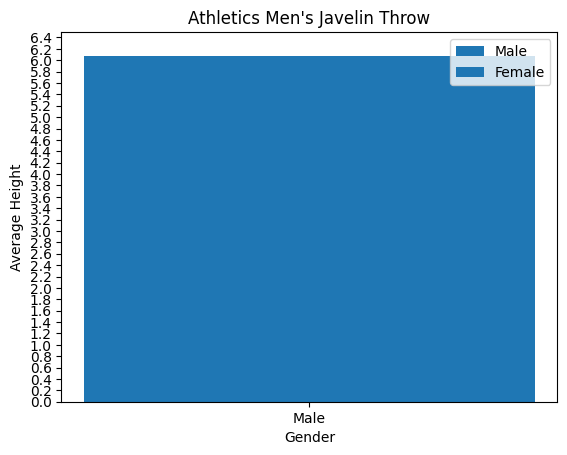

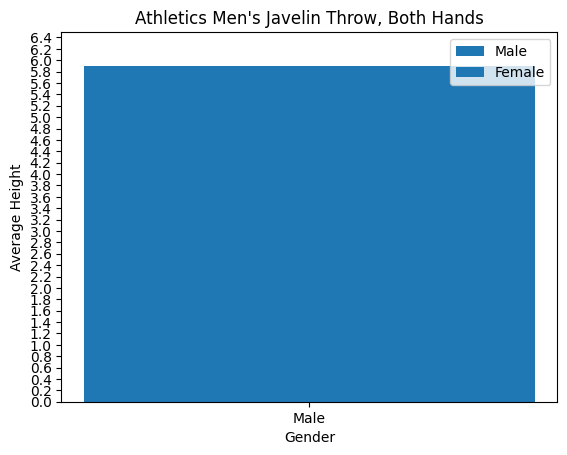

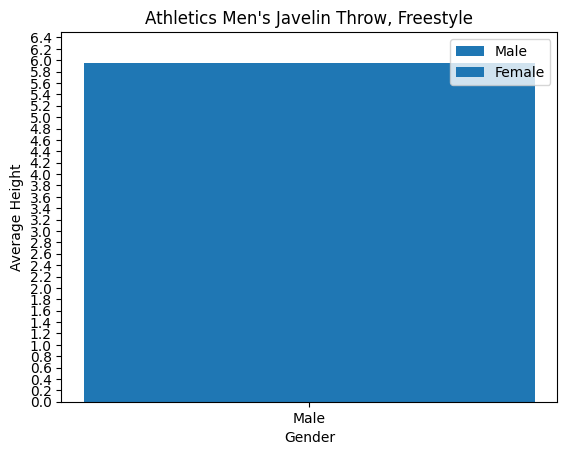

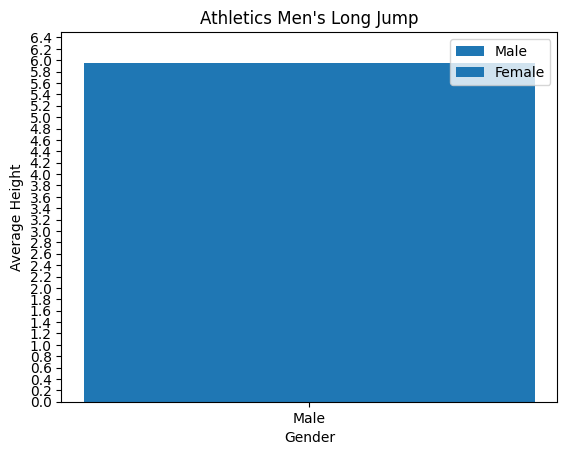

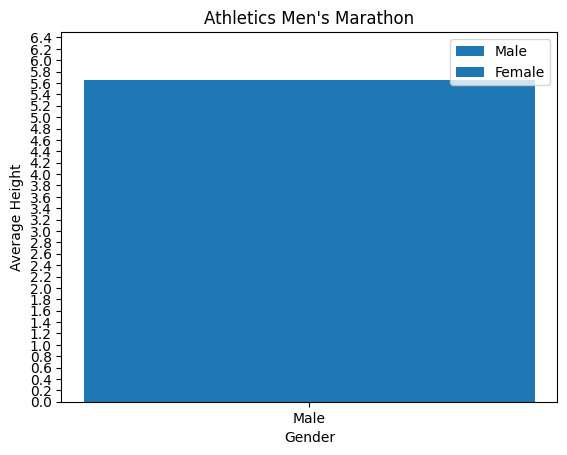

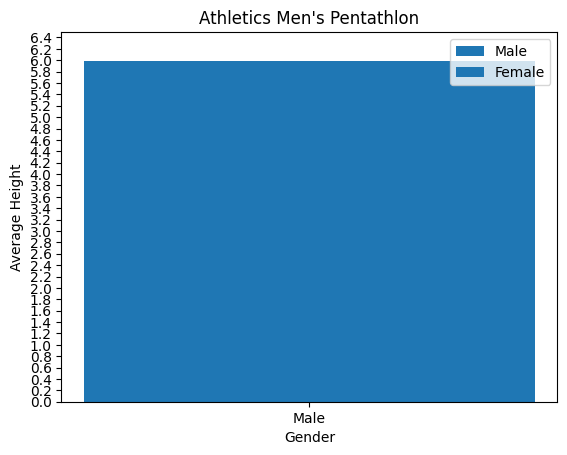

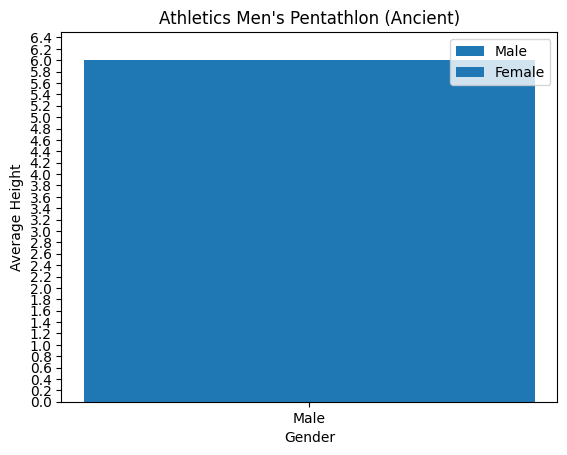

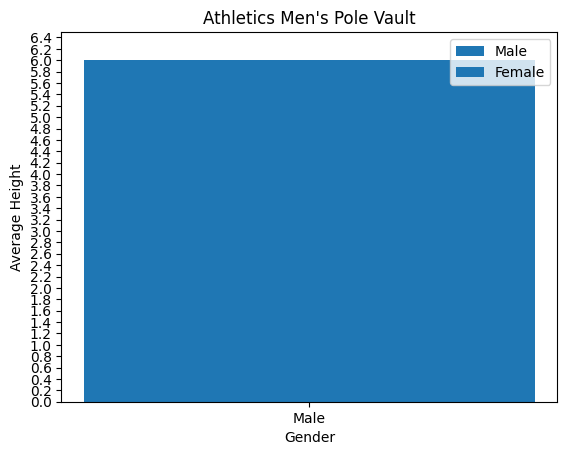

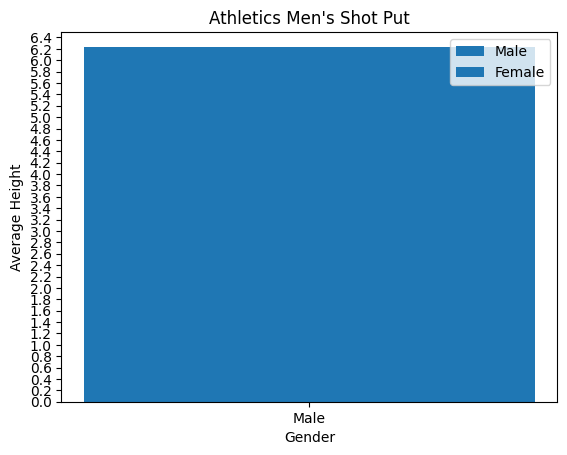

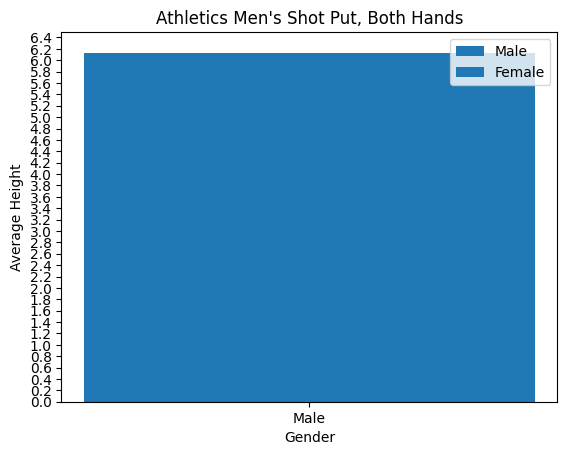

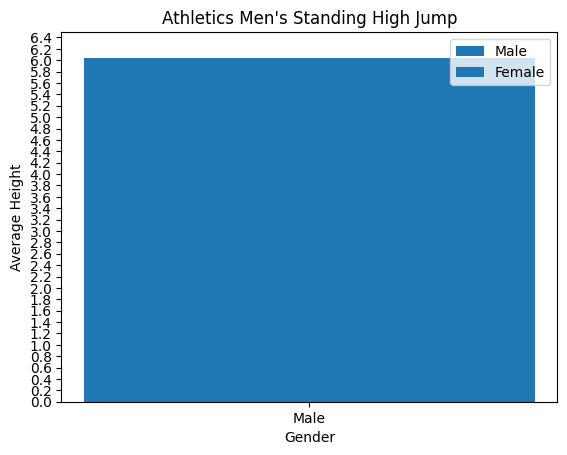

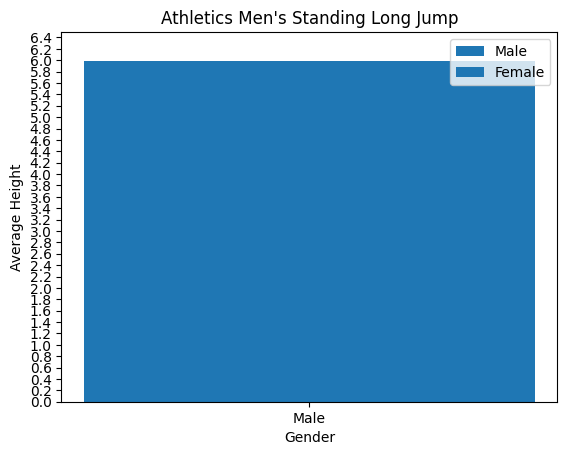

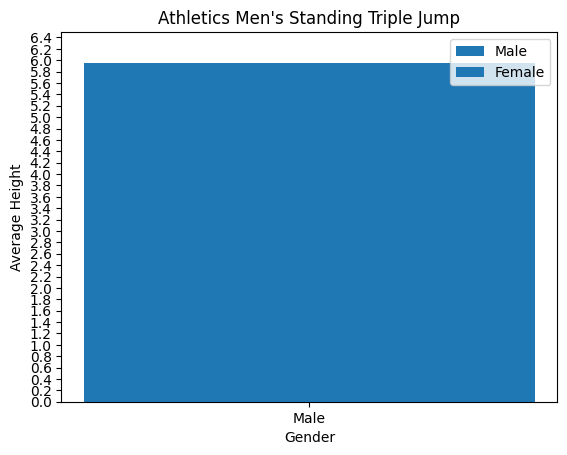

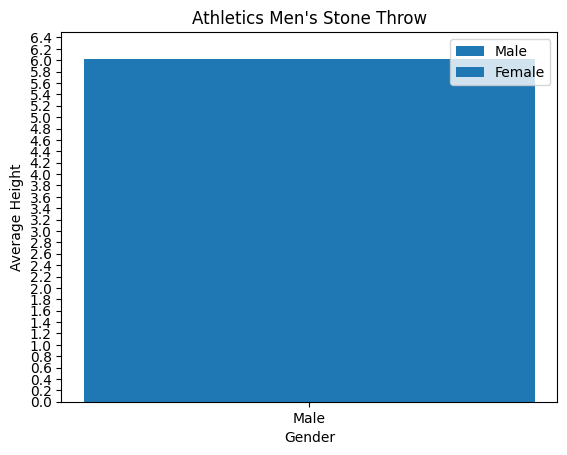

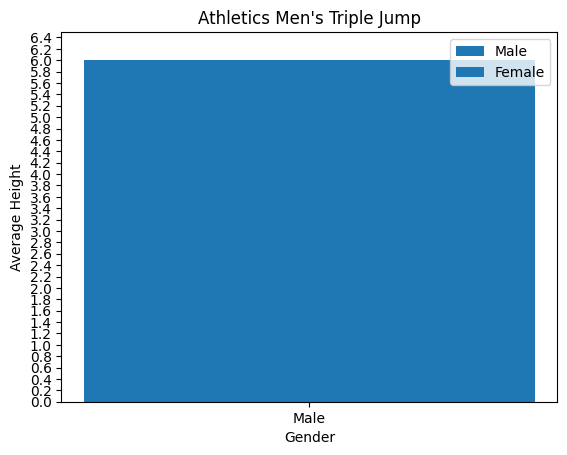

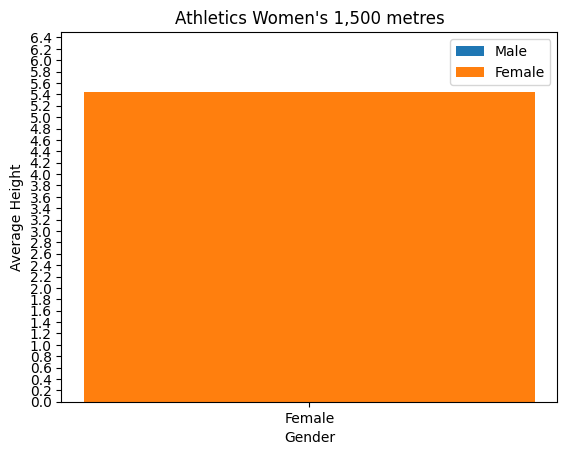

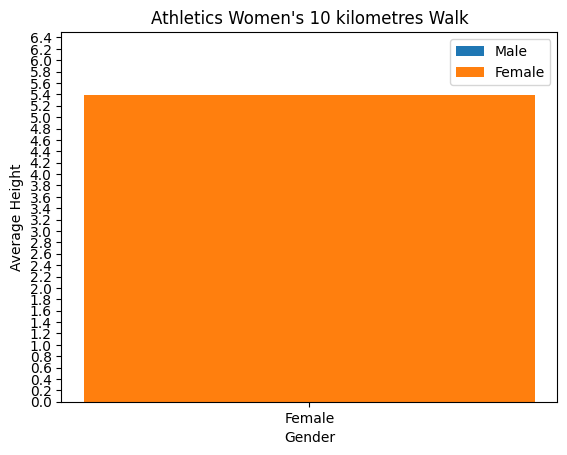

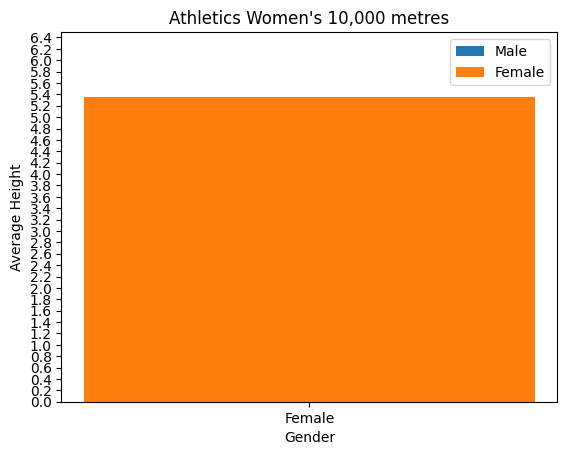

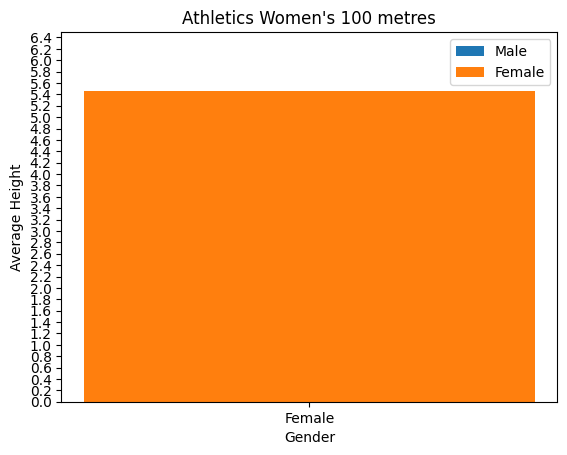

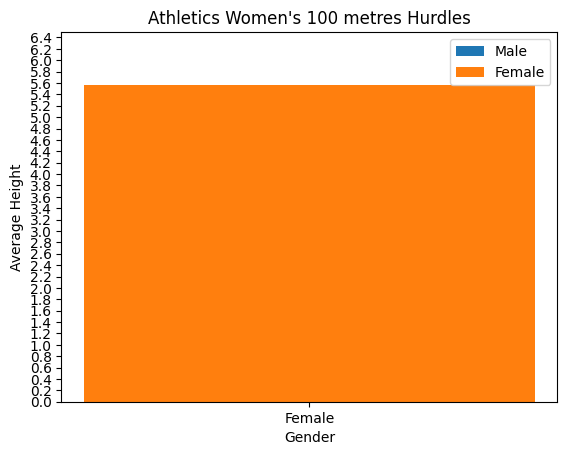

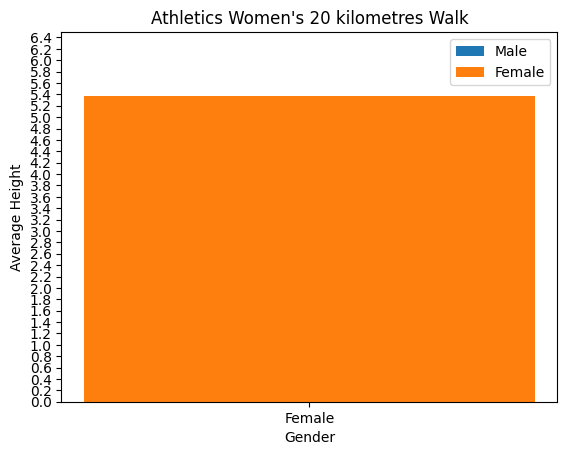

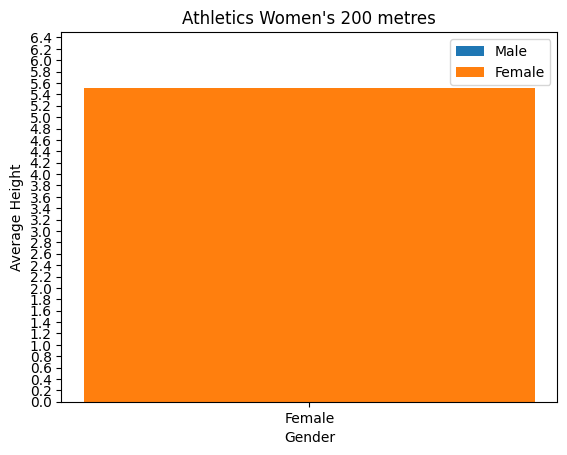

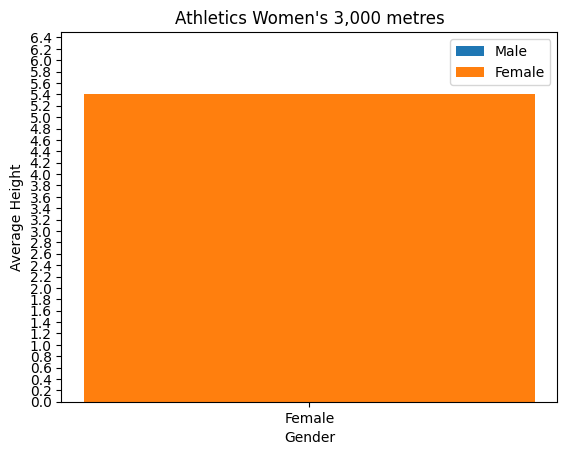

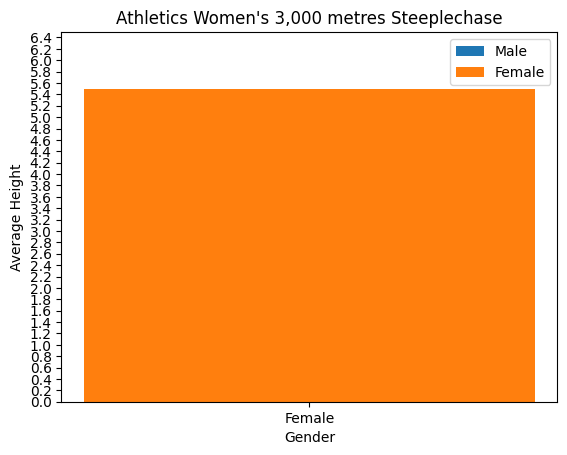

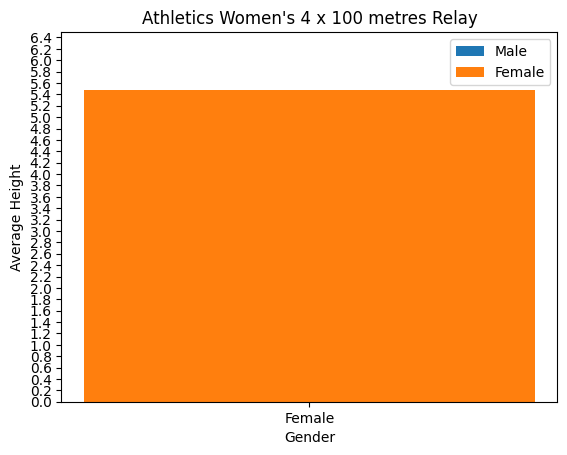

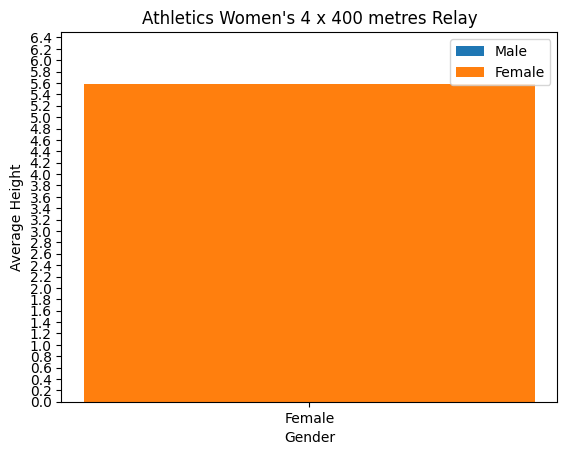

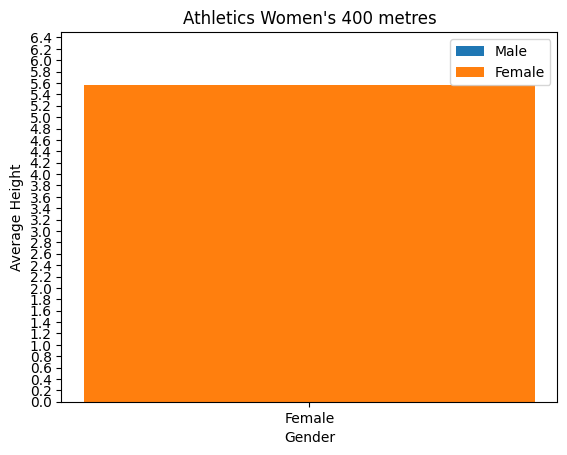

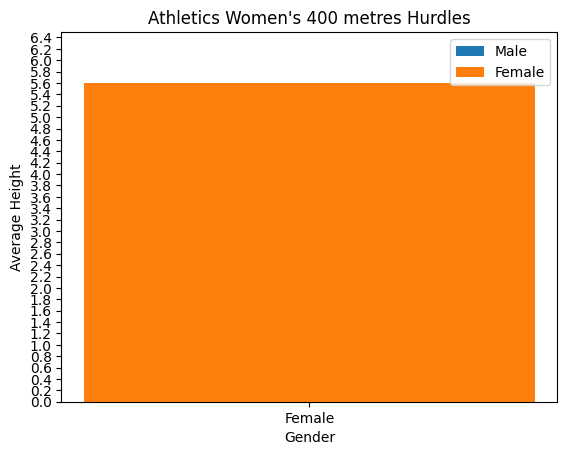

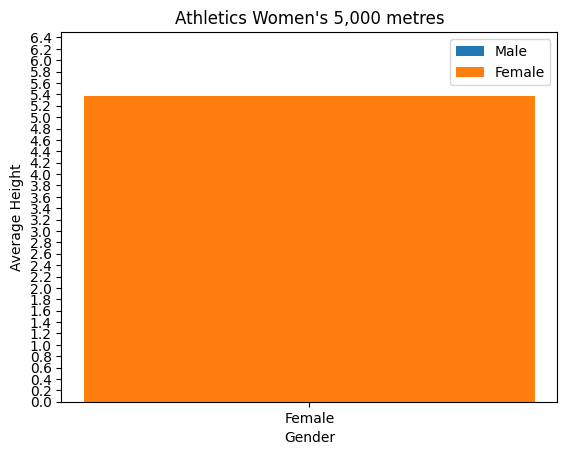

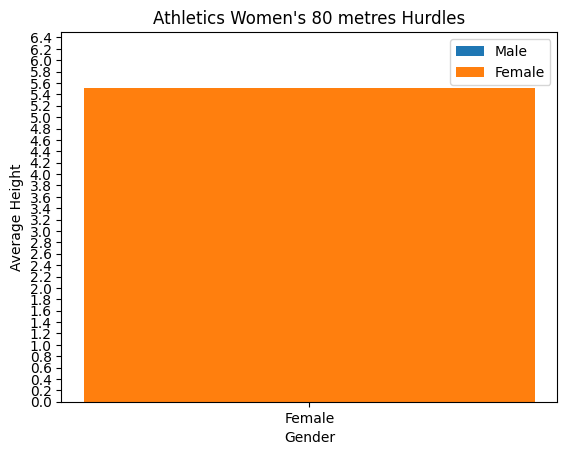

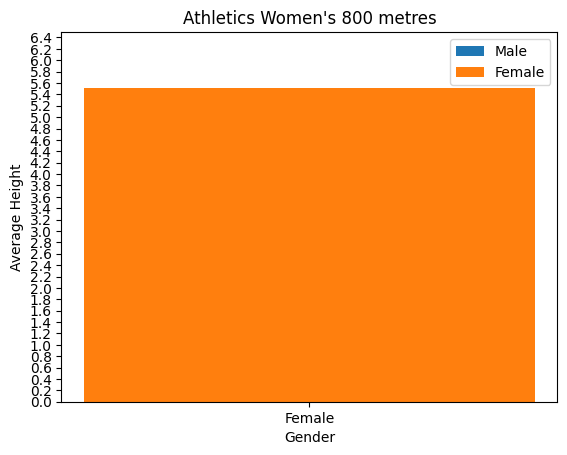

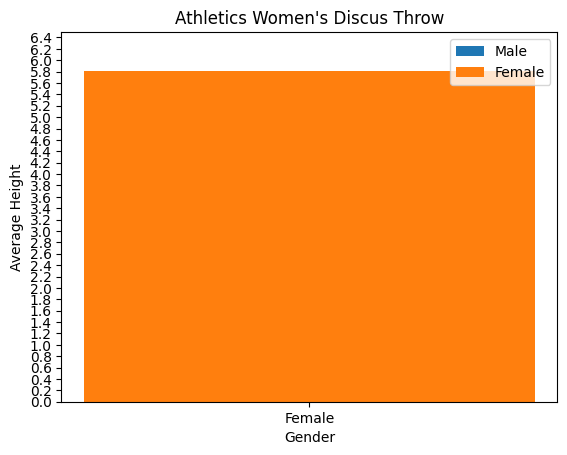

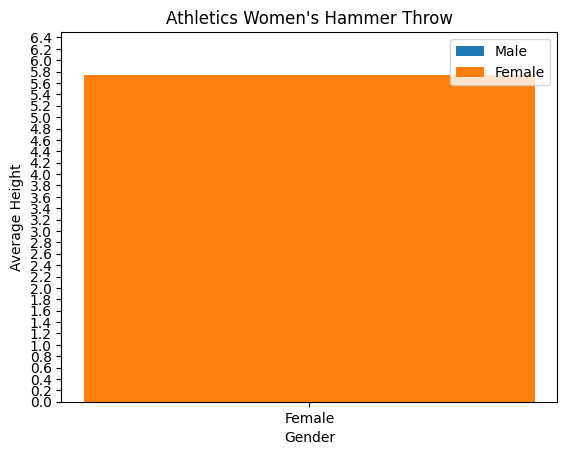

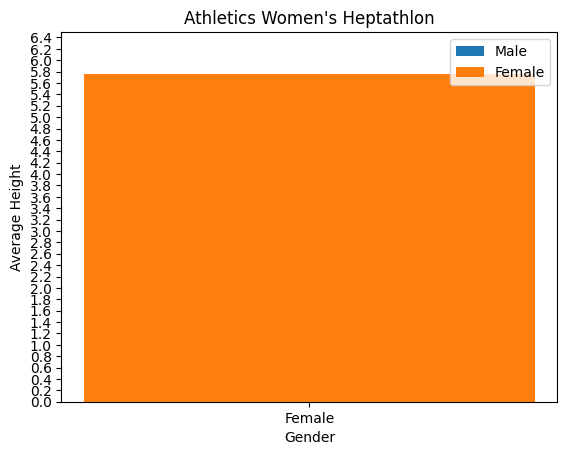

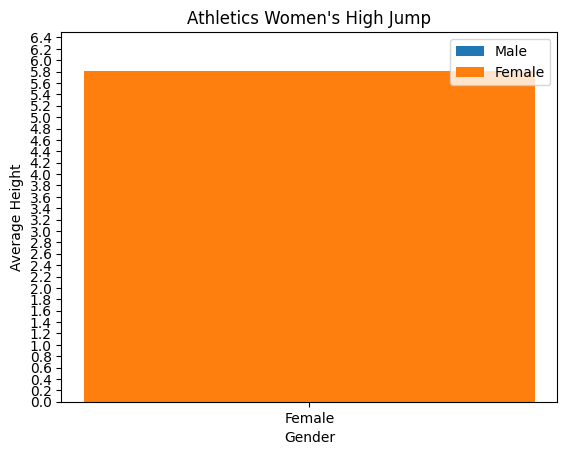

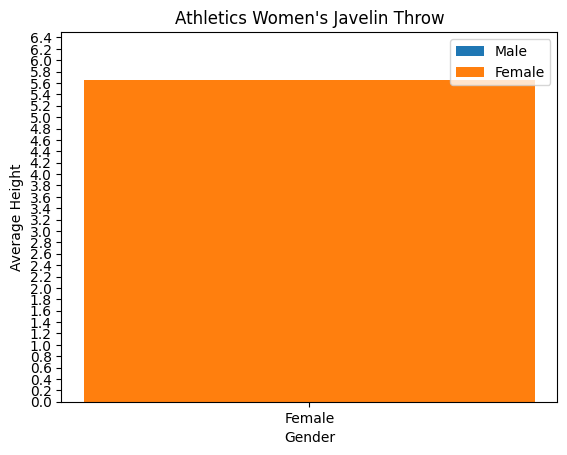

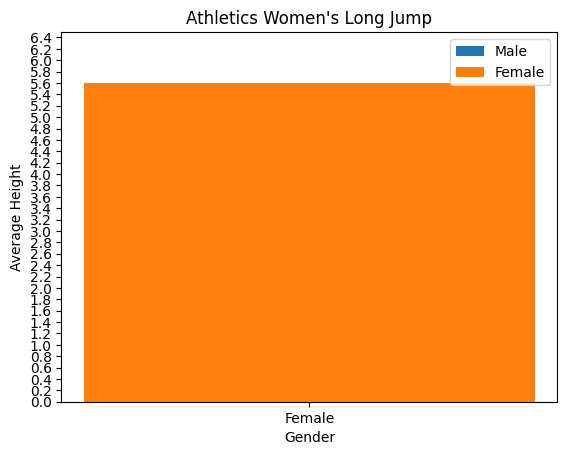

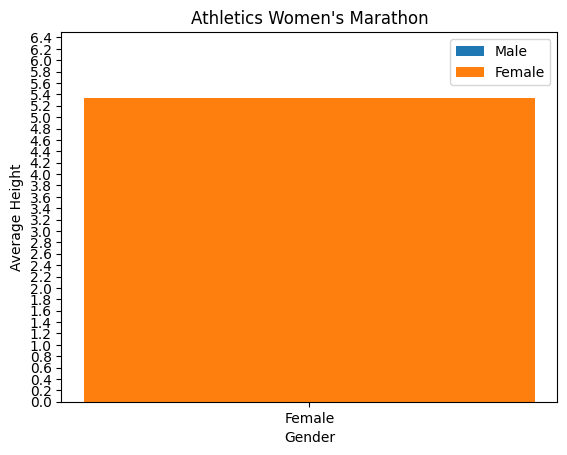

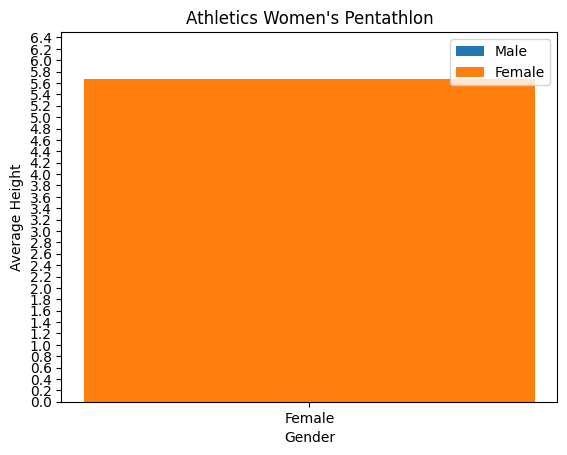

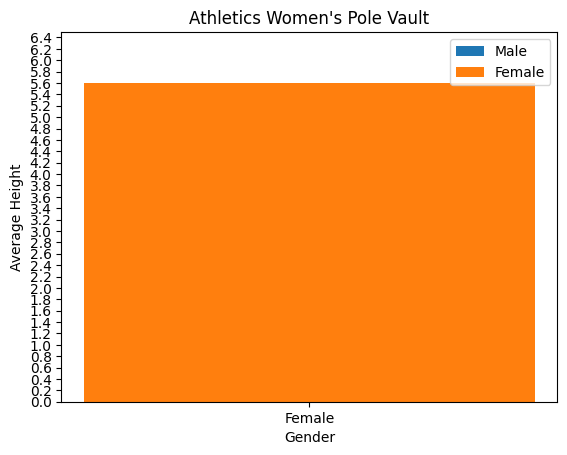

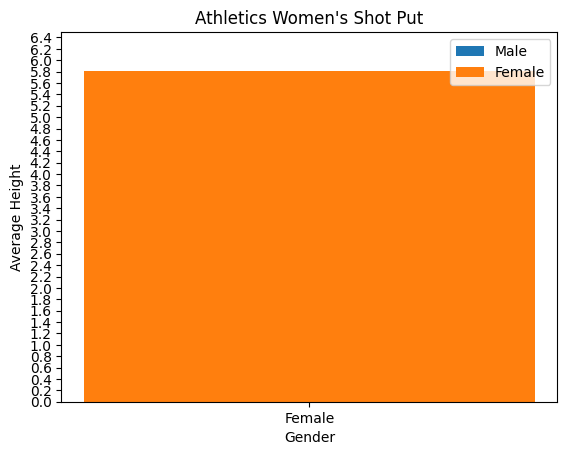

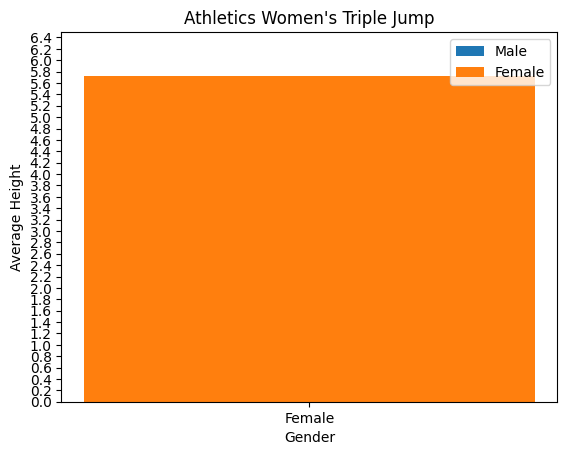

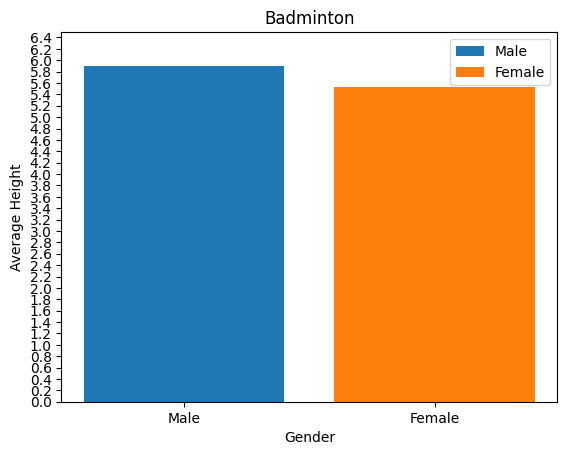

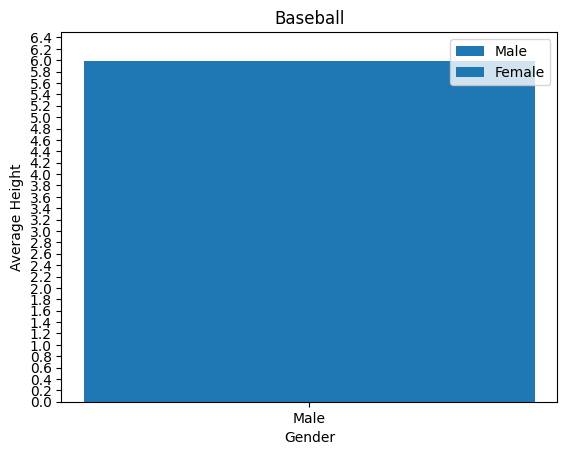

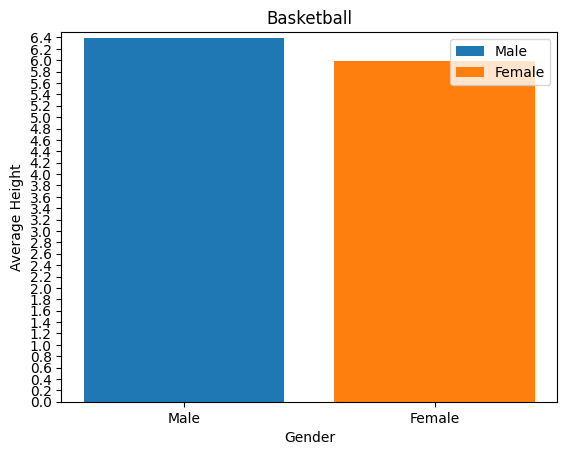

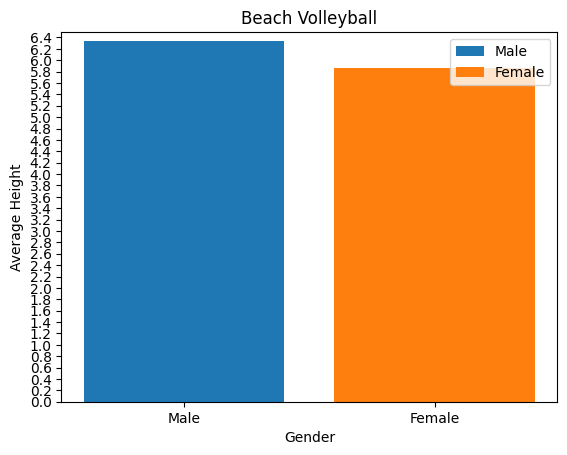

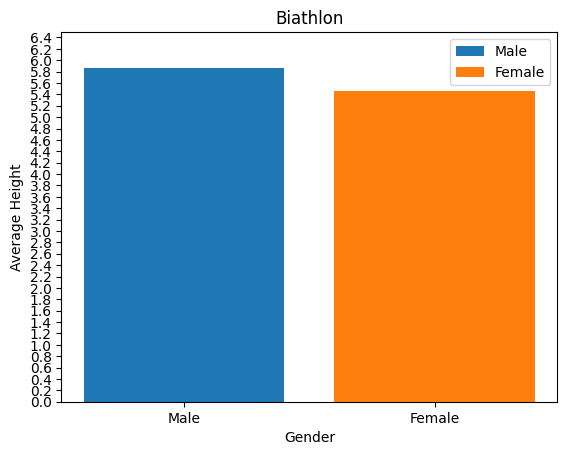

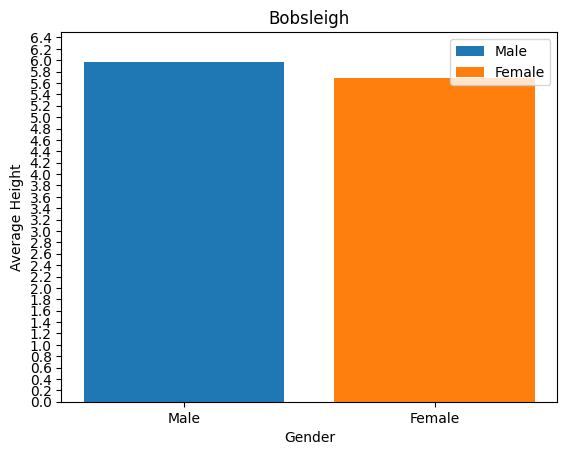

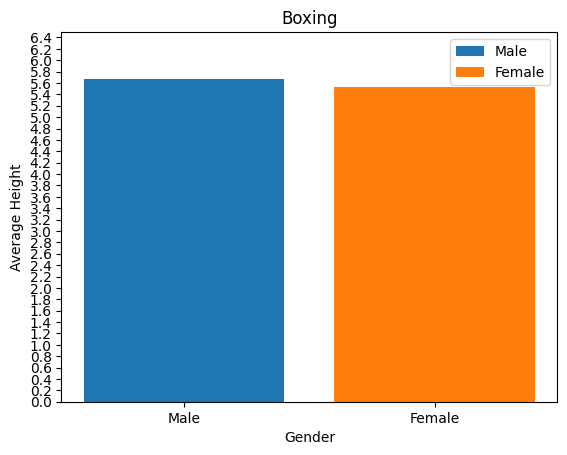

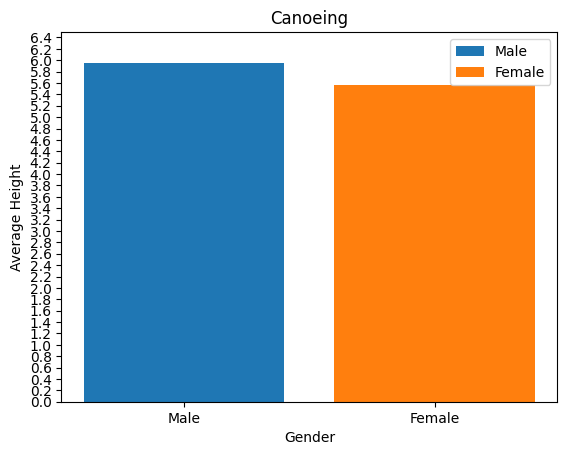

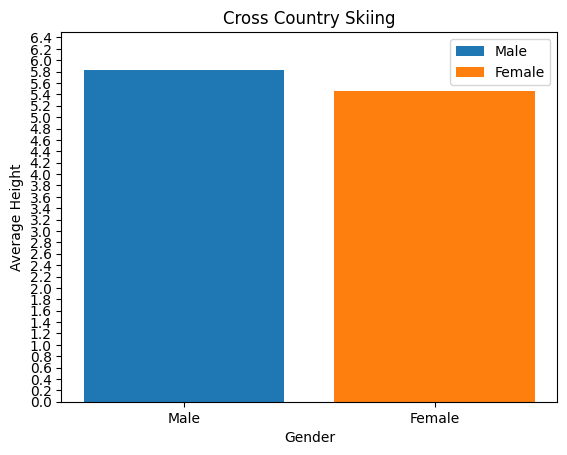

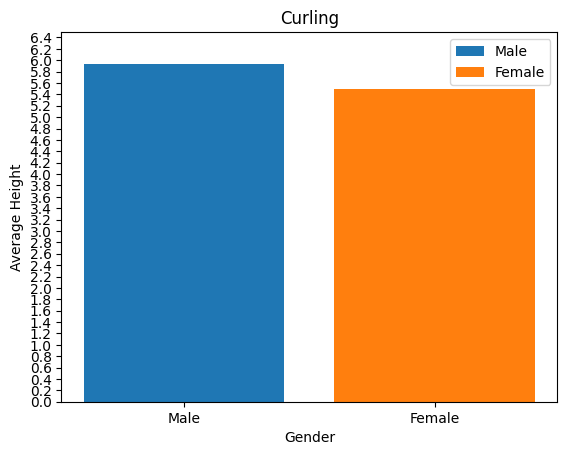

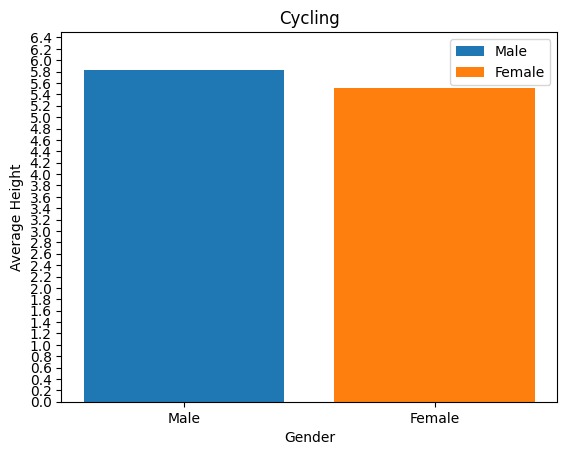

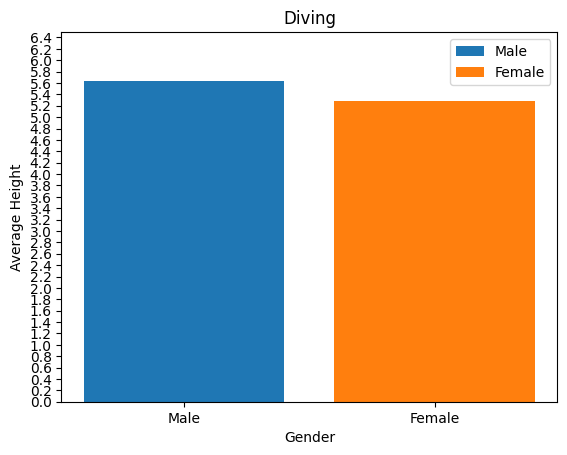

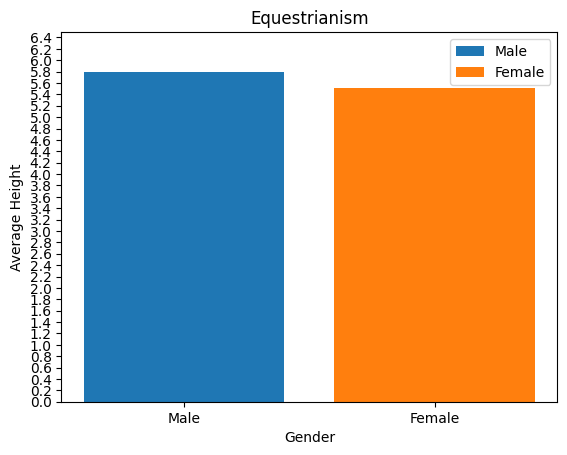

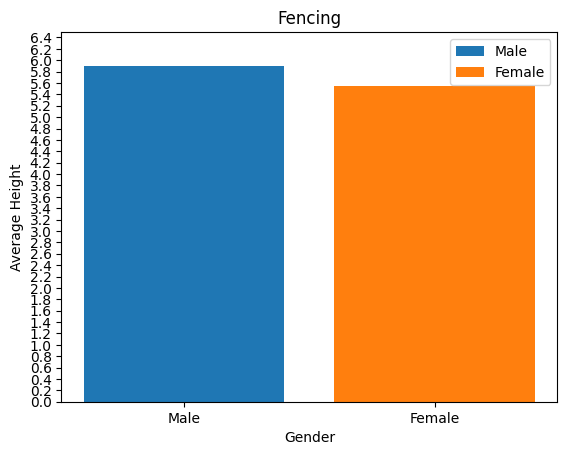

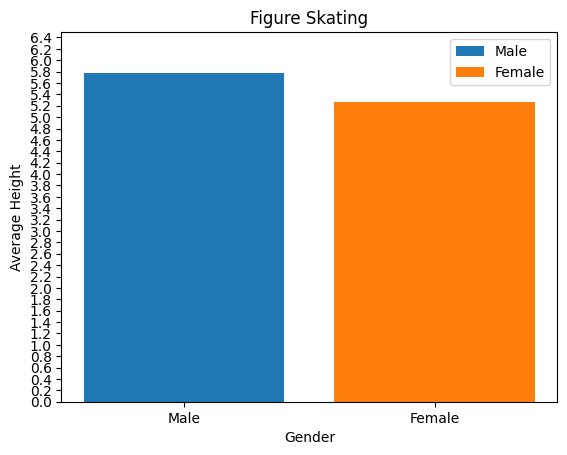

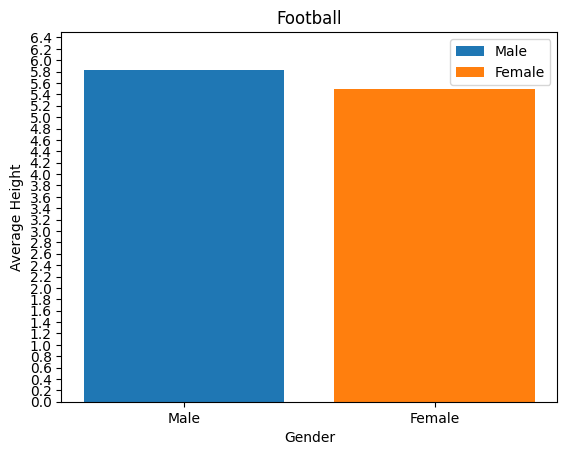

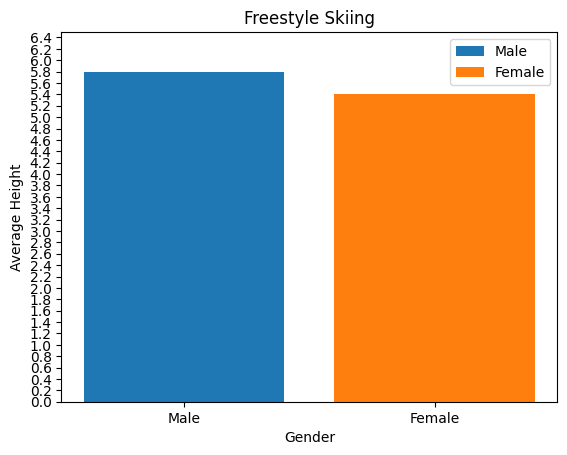

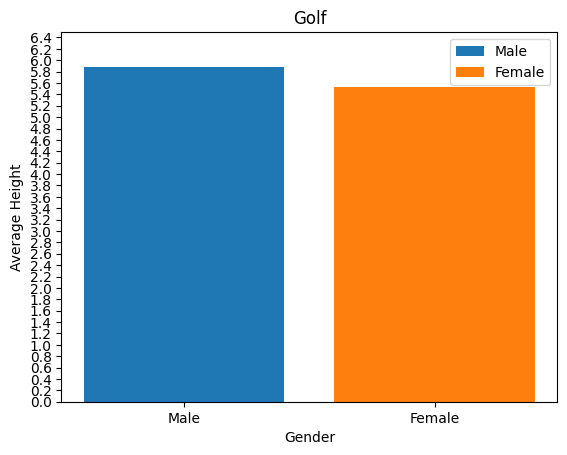

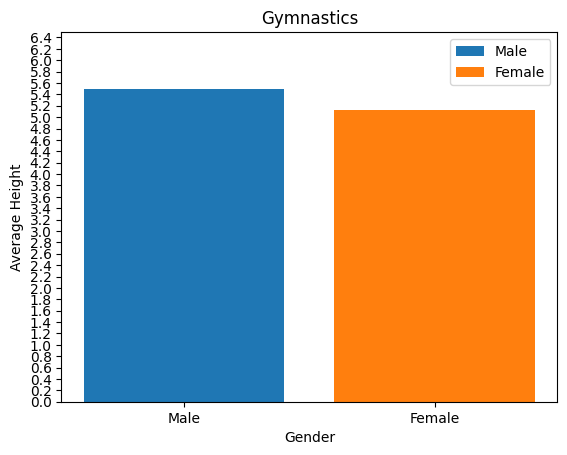

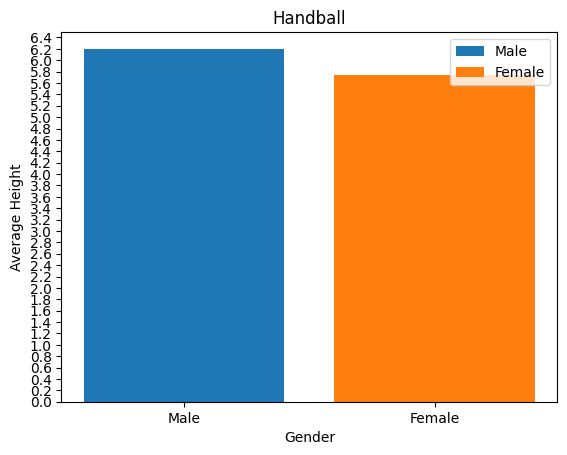

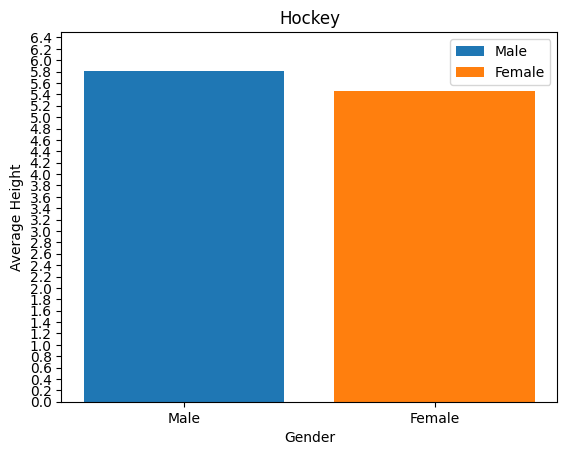

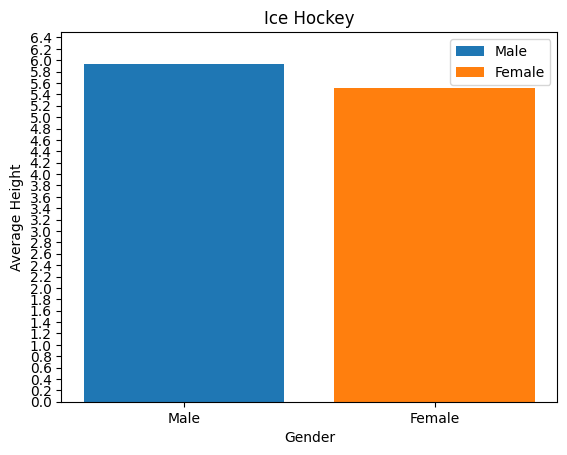

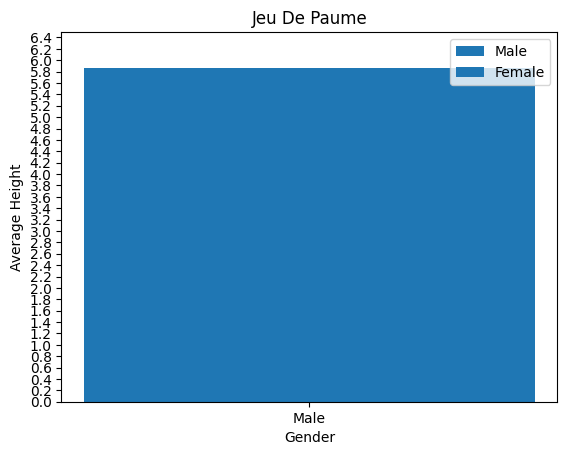

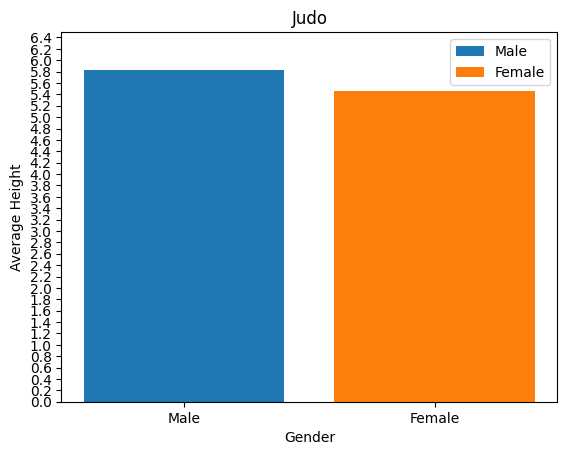

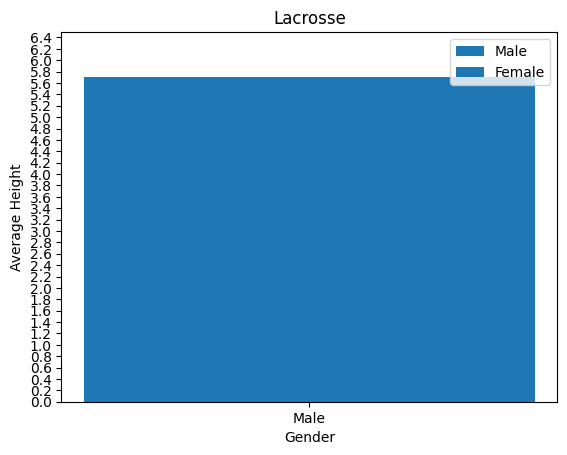

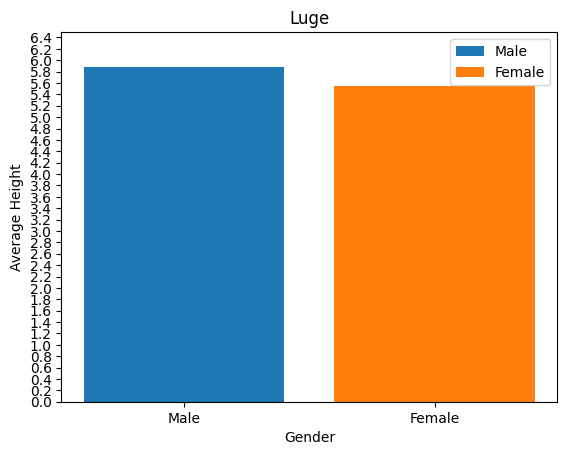

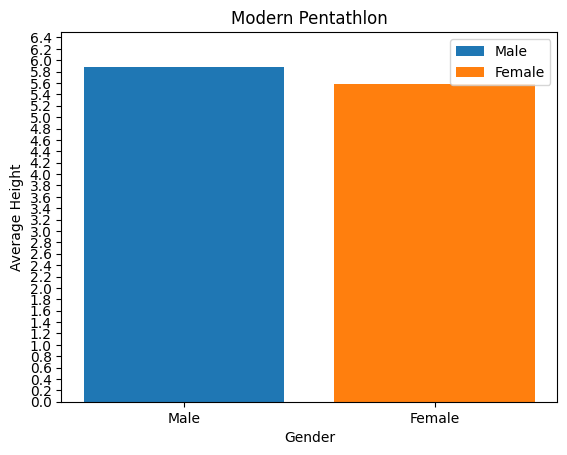

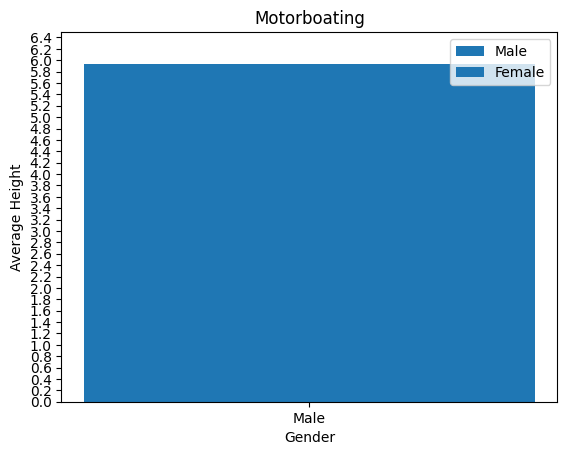

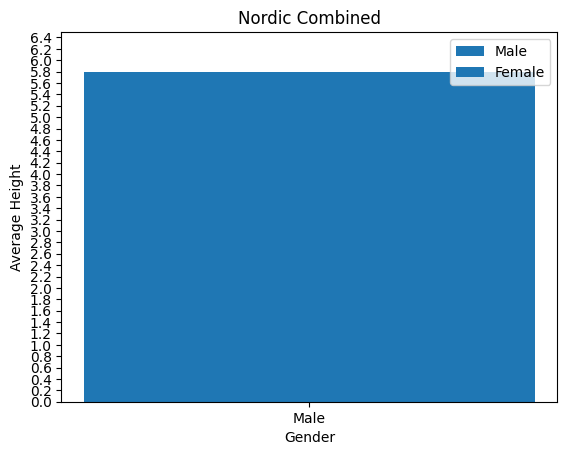

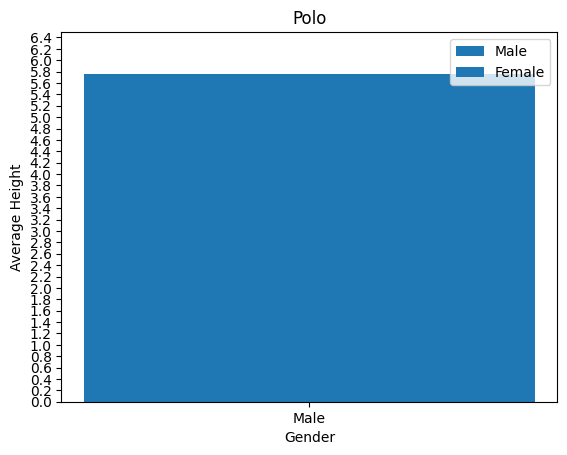

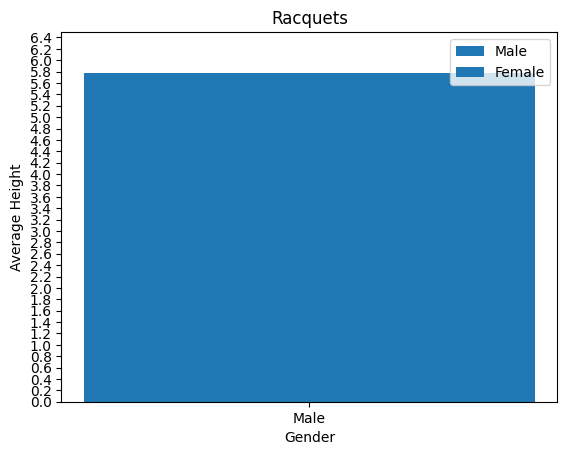

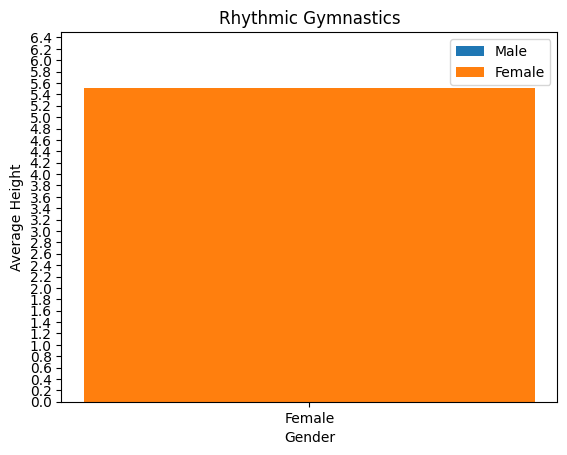

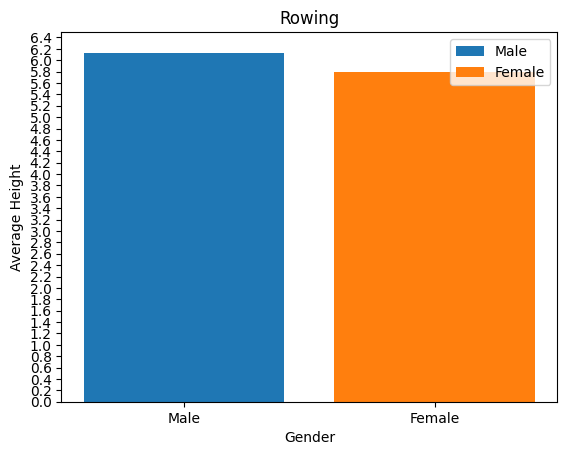

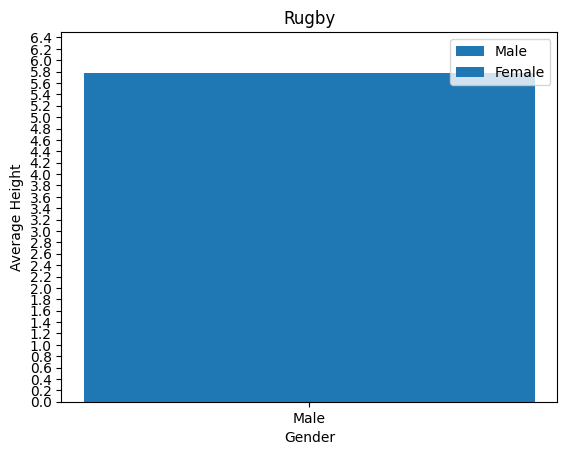

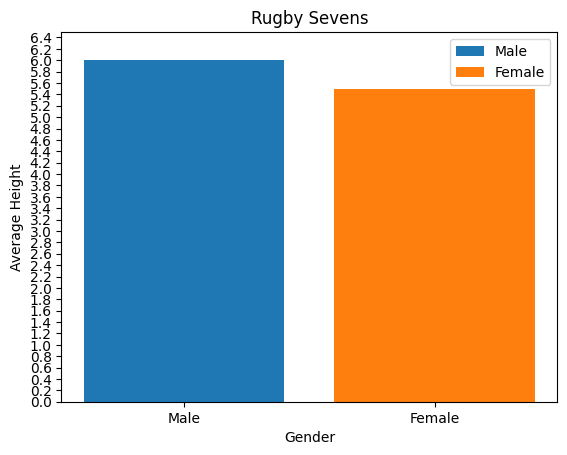

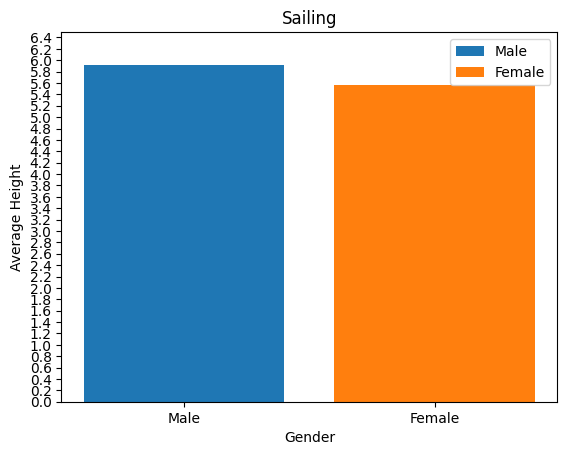

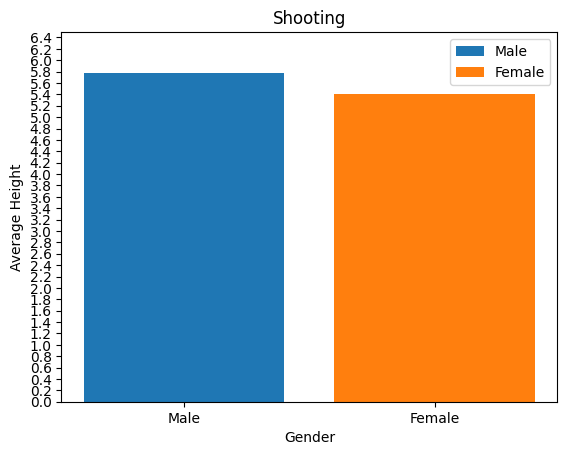

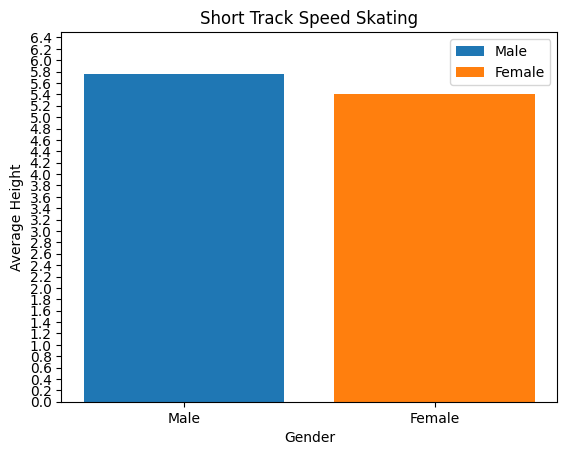

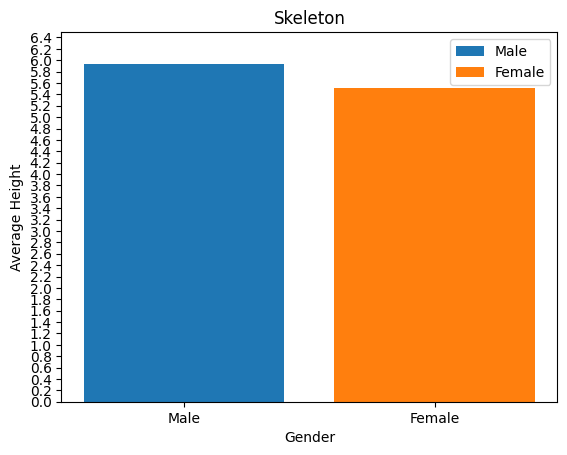

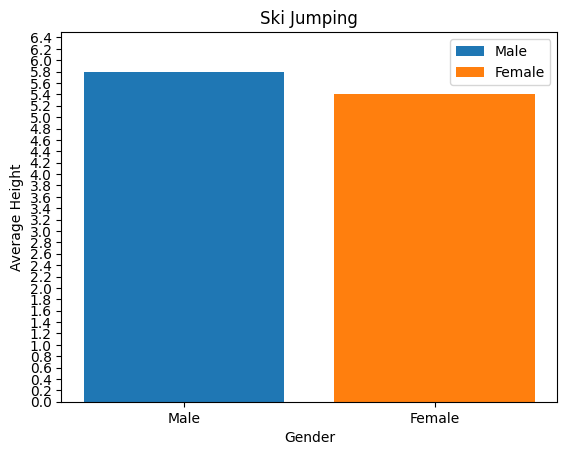

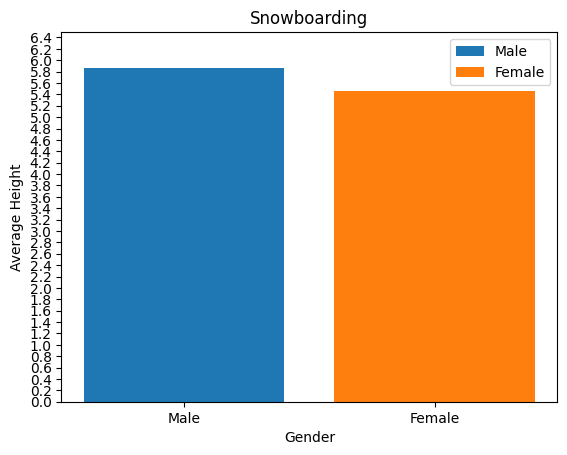

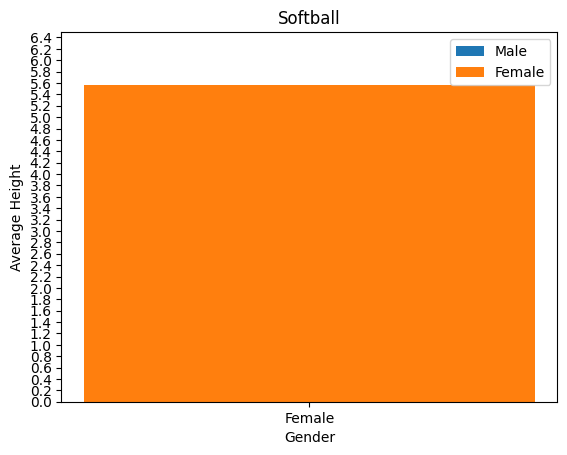

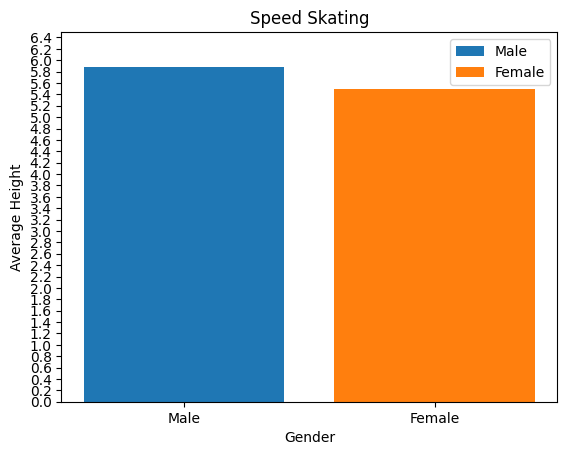

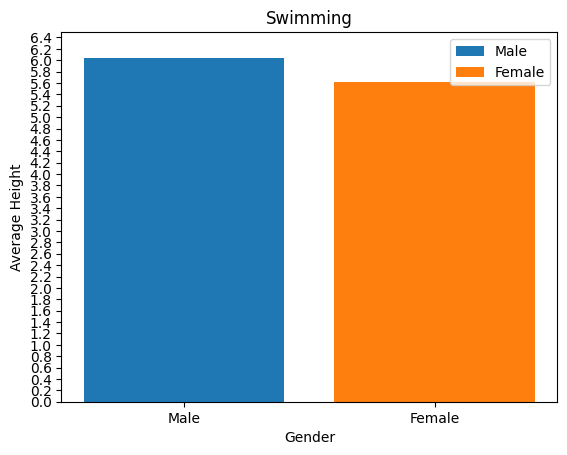

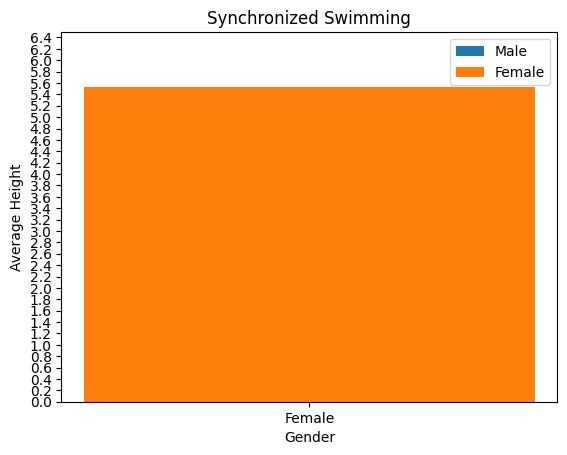

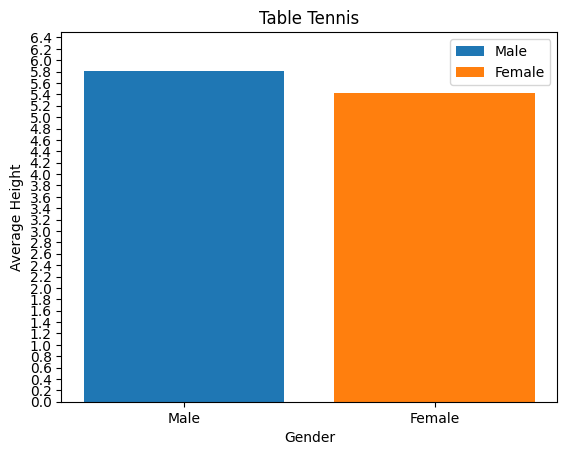

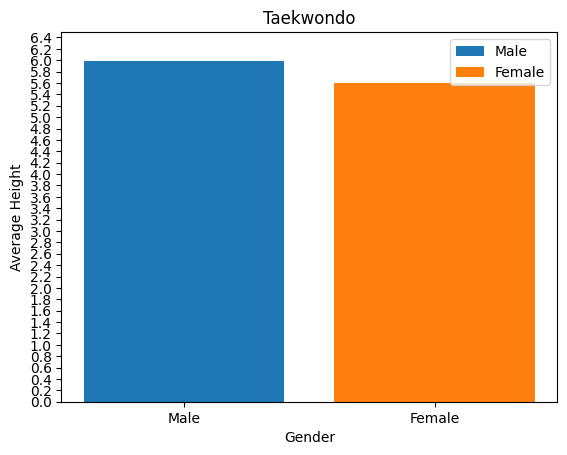

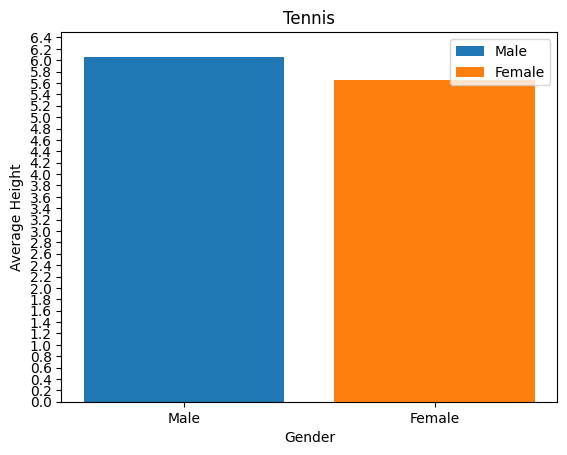

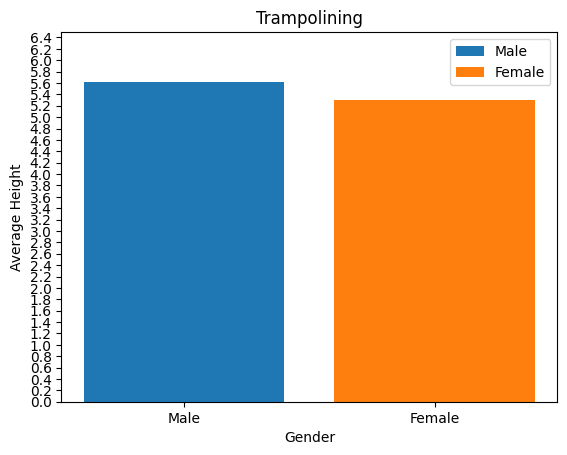

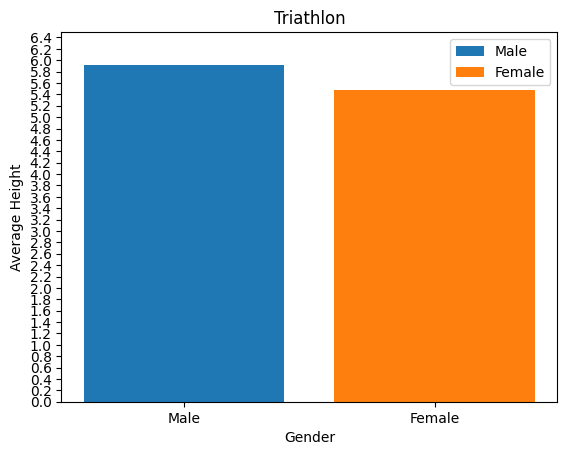

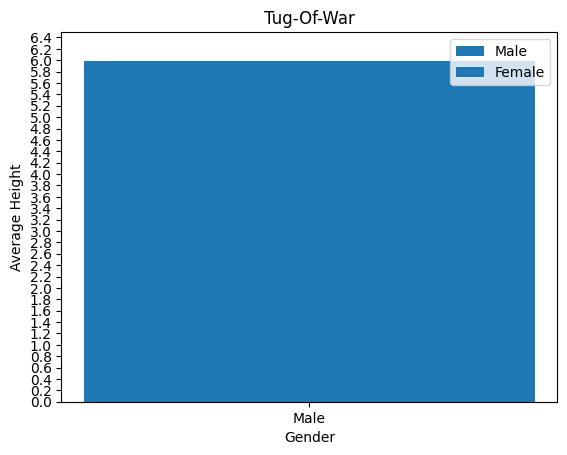

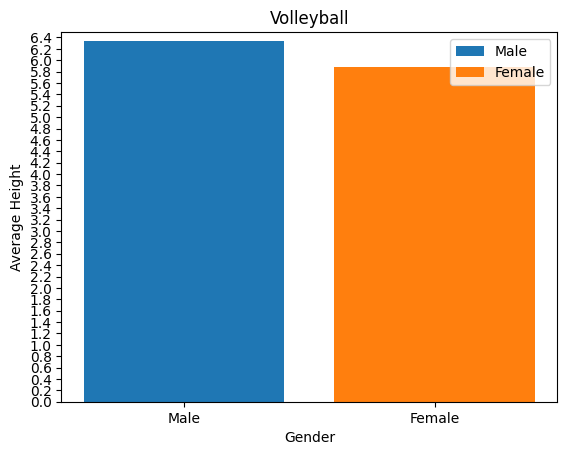

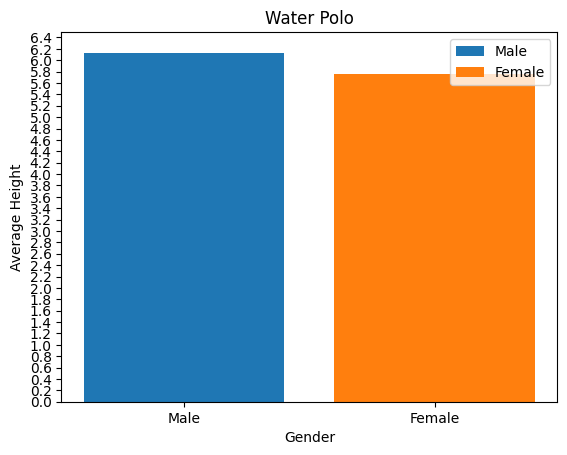

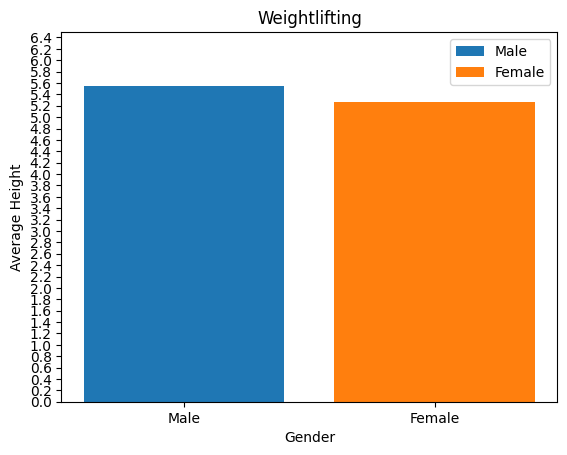

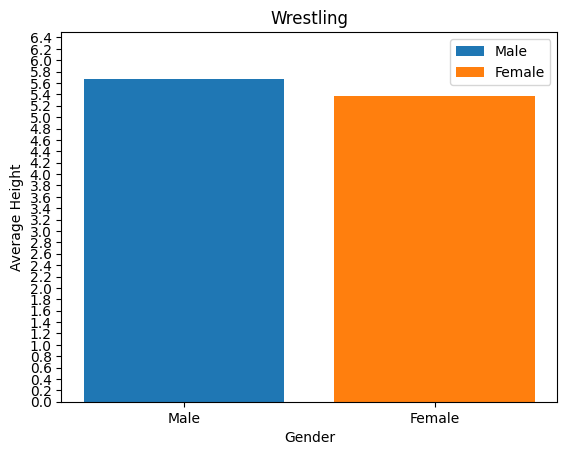

In [24]:
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()
df = df.dropna(subset=['Height'])

max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

sports = gb_sport_sex['Sport'].unique()
#print(sports)

for sport in sports:
    sport_df = gb_sport_sex[gb_sport_sex['Sport'] == sport]
    male_heights = sport_df[sport_df['Sex'] == 'M']['Height']
    female_heights = sport_df[sport_df['Sex'] == 'F']['Height']
    fig, ax = plt.subplots()
    ax.bar('Male', male_heights, label='Male')
    ax.bar('Female', female_heights, label='Female')
    ax.set_title(sport)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Average Height')
    ax.legend()
    ax.set_ylim([0, gb_sport_sex['Height'].max()+0.1])
    ax.set_yticks(np.arange(0, gb_sport_sex['Height'].max()+0.1, .2))
    #plt.show()

C:\Users\tdogl\AppData\Local\Temp\ipykernel_13964\2384435204.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()
C:\Users\tdogl\AppData\Local\Temp\ipykernel_13964\2384435204.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_max_height_sport_sex['Sport'] = pd.Categorical(filtered_max_height_sport_sex['Sport'], categories=sorted_sports, ordered=True)


The sport with the tallest average males is Basketball, with an average height of 6.4 ft
The sport with the tallest average females is Basketball, with an average height of 6.0 ft


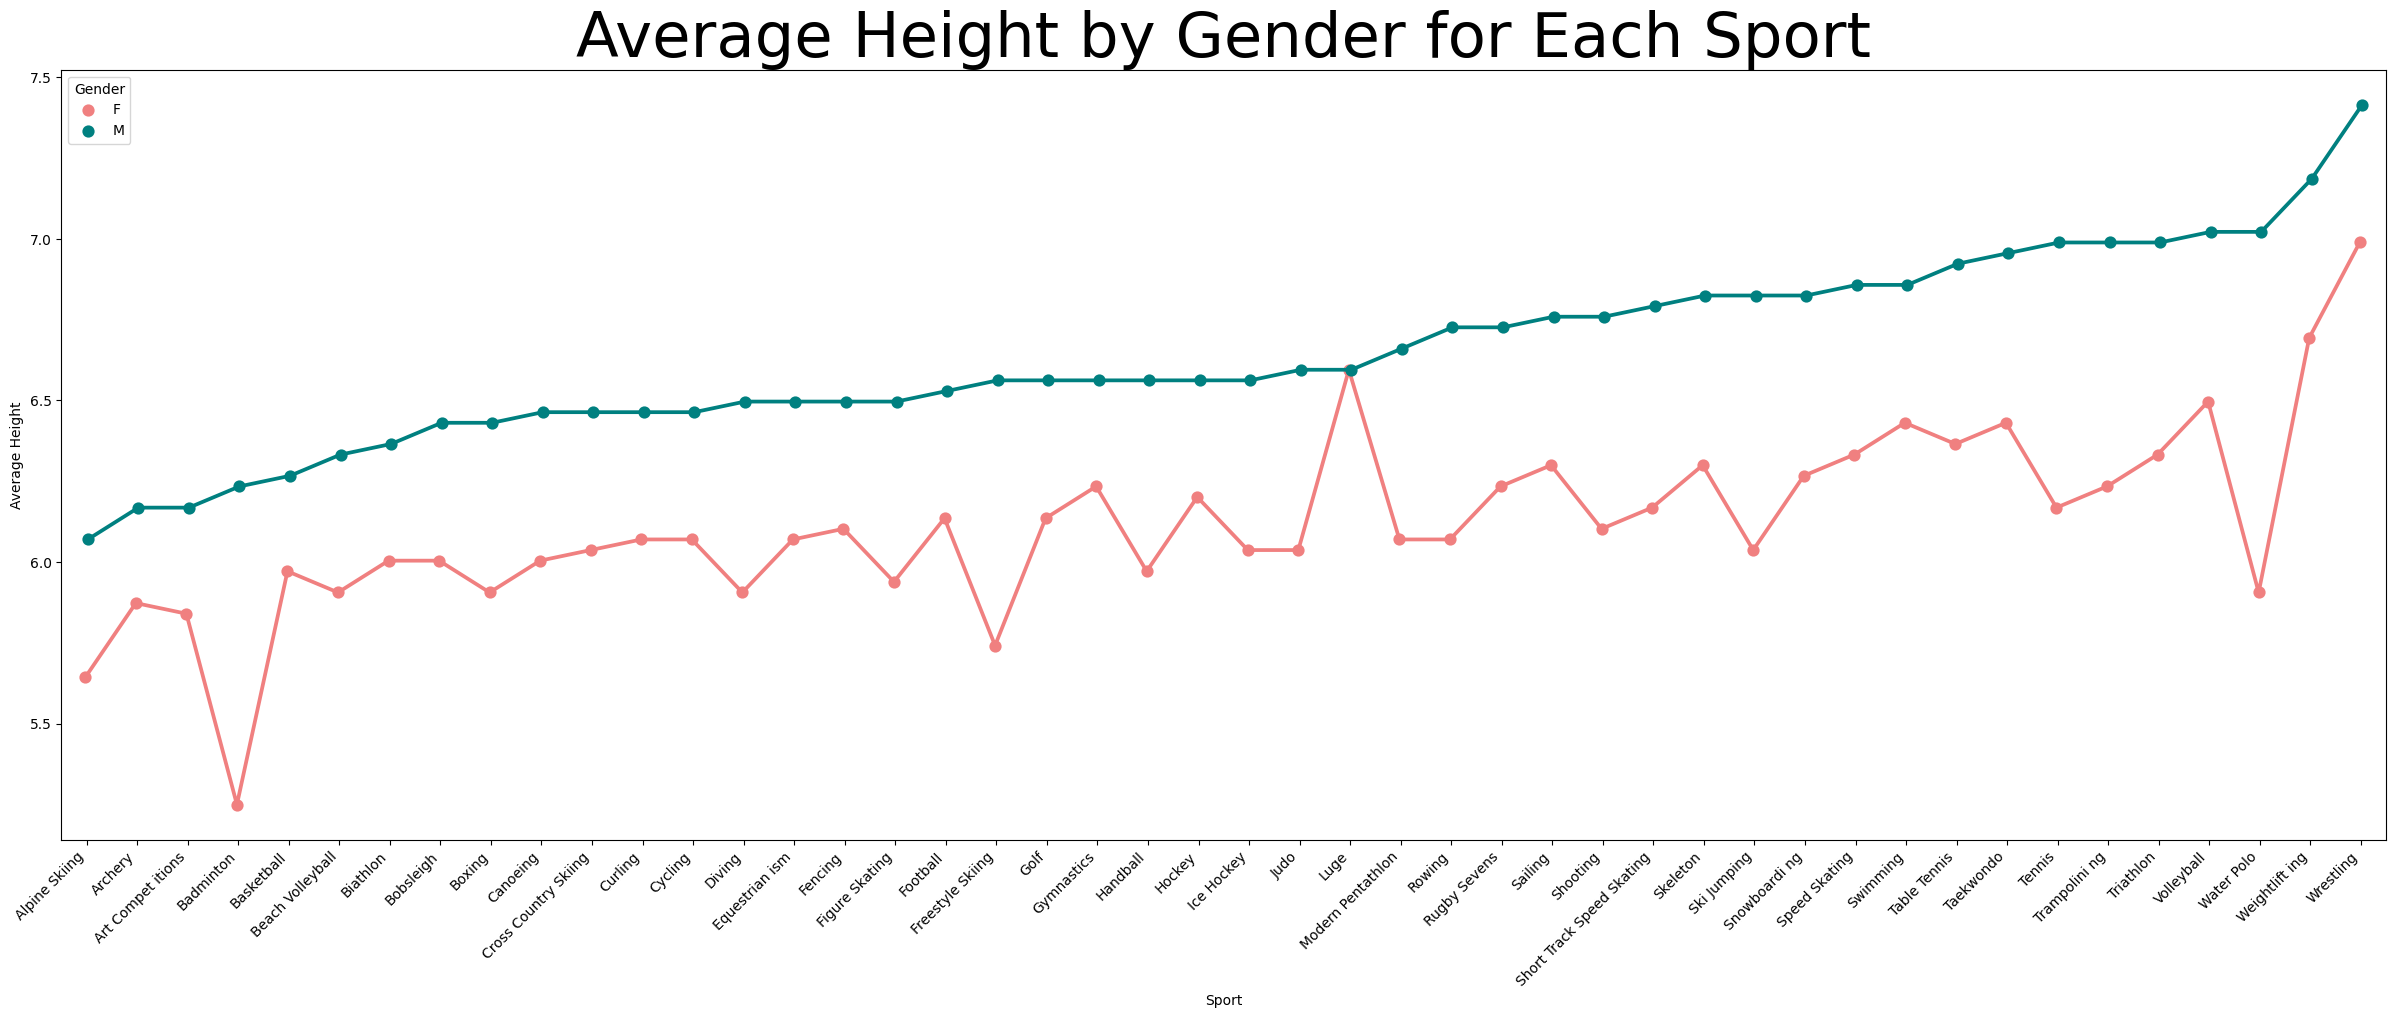

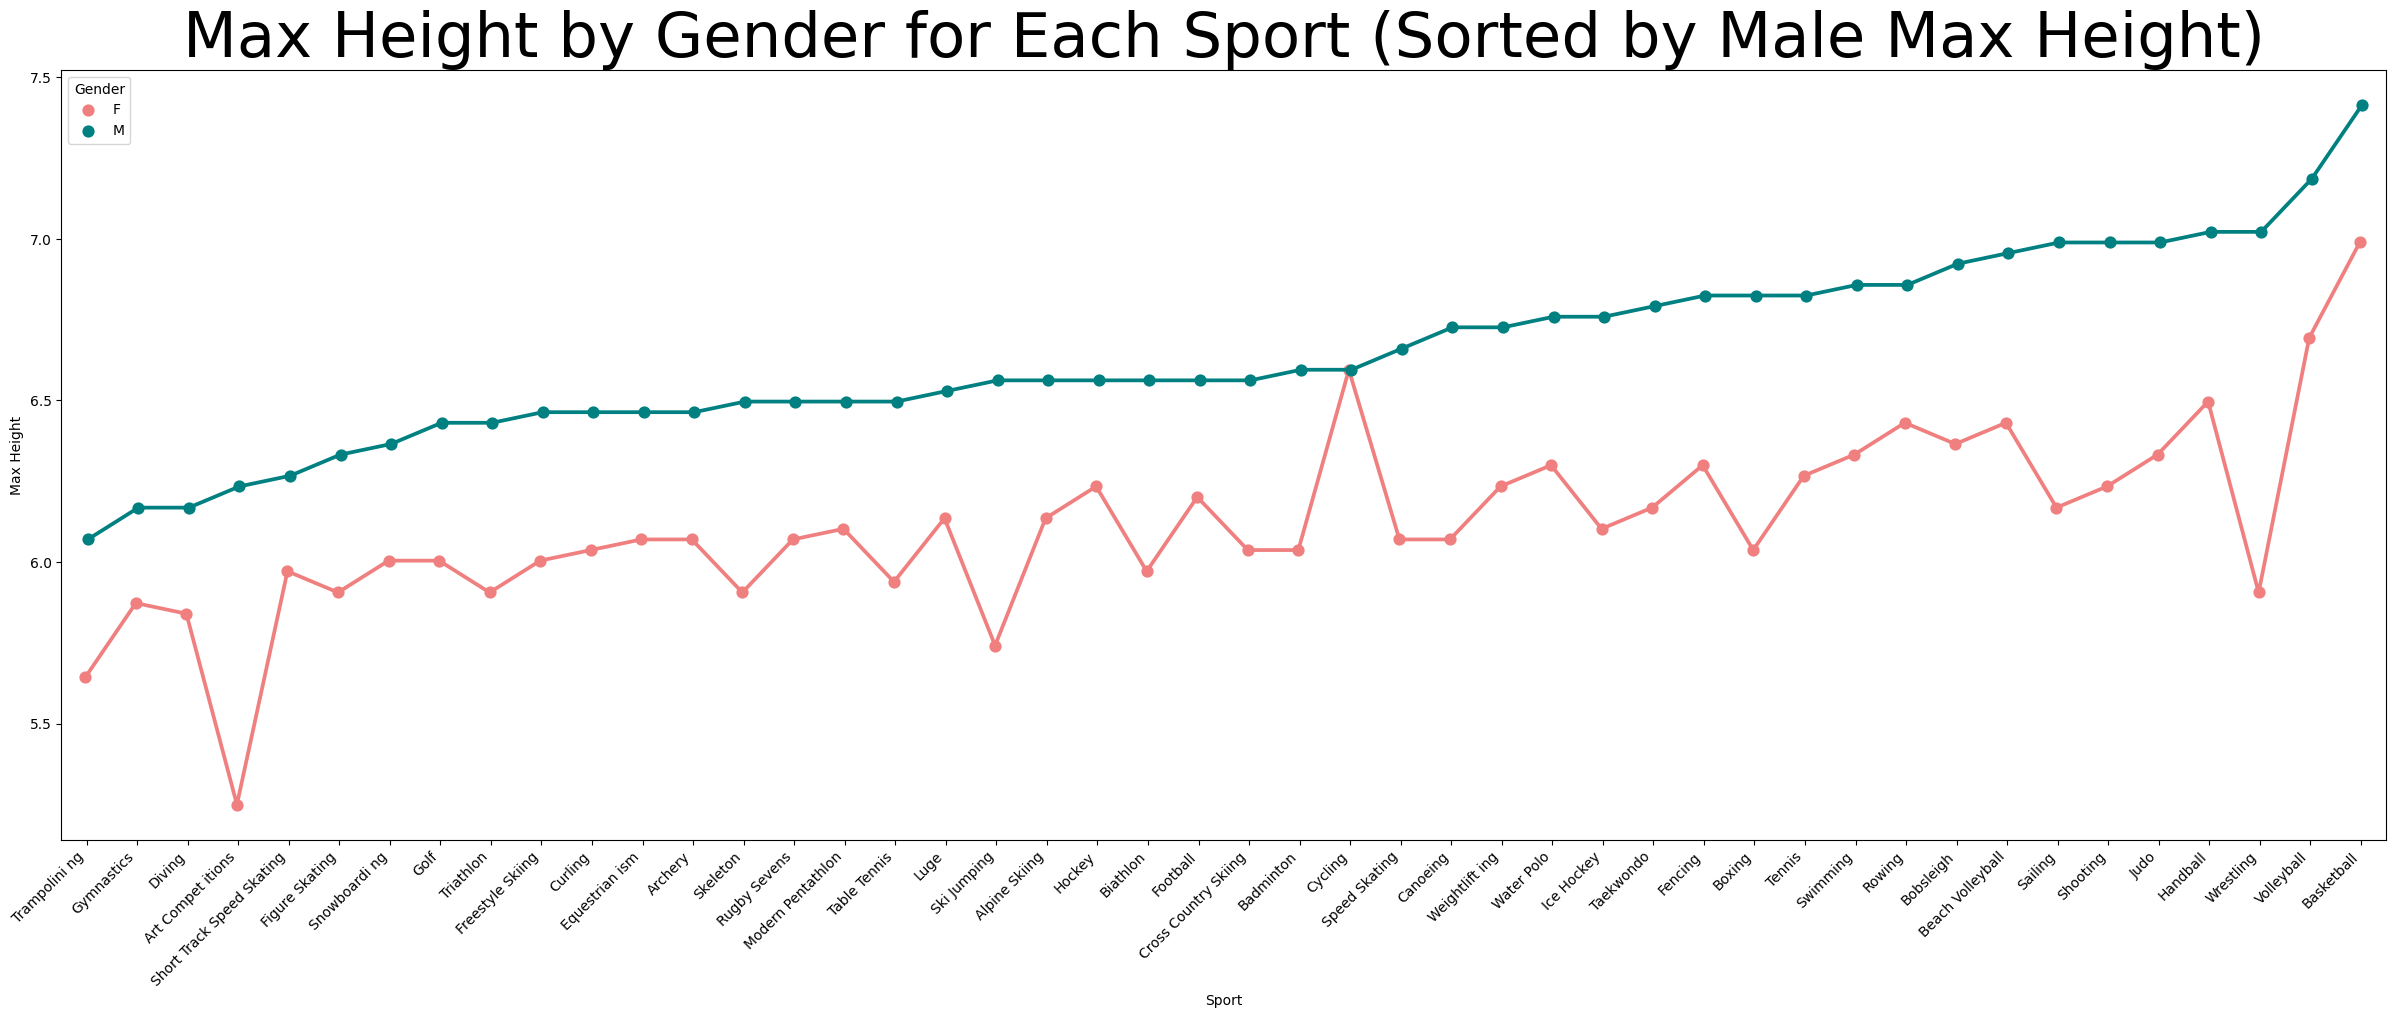

In [20]:
import textwrap                 ## I think both the graphs are the same but I dont have time to lable the plot points or double check the logic atm 

df = df.dropna(subset=['Height'])
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()


max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

sports = gb_sport_sex['Sport'].unique()

max_height_sport_sex = df.groupby(['Sport', 'Sex'])['Height'].max().reset_index()

# Filter out sports with both genders
filtered_sports = [sport for sport in sports if all(gender in max_height_sport_sex[max_height_sport_sex['Sport'] == sport]['Sex'].values for gender in ['M', 'F'])]

male_max_heights = max_height_sport_sex[(max_height_sport_sex['Sex'] == 'M') & (max_height_sport_sex['Sport'].isin(filtered_sports))]
male_max_heights_sorted = male_max_heights.sort_values(by='Height')
filtered_max_height_sport_sex = max_height_sport_sex[max_height_sport_sex['Sport'].isin(filtered_sports)]

sorted_sports = male_max_heights_sorted['Sport'].values
filtered_max_height_sport_sex['Sport'] = pd.Categorical(filtered_max_height_sport_sex['Sport'], categories=sorted_sports, ordered=True)
filtered_max_height_sport_sex = filtered_max_height_sport_sex.sort_values(['Sport', 'Sex'])

custom_palette = {'M': 'teal', 'F': 'lightcoral'}
# Create the point plot with the custom palette
plt.figure(figsize=(30, 10))
sns.pointplot(data=filtered_max_height_sport_sex, x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)

# Customize the plot
plt.title('Average Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()

# Plot Max Height
plt.figure(figsize=(30, 10))
sns.pointplot(data=filtered_max_height_sport_sex, x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)

# Customize the plot
plt.title('Max Height by Gender for Each Sport (Sorted by Male Max Height)', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Max Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in male_max_heights_sorted['Sport'].unique()]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()